In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


In [173]:

df = pd.read_csv('/content/gas_turbines.csv')
df.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468  
3  3.1923  82.670  
4  3.2484  82.311

In [174]:
df.isnull().any()

AT      False
AP       True
AH       True
AFDP     True
GTEP     True
TIT      True
TAT      True
TEY      True
CDP      True
CO       True
NOX      True
dtype: bool

In [175]:
df.shape

(16436, 11)

In [176]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16436 entries, 0 to 16435
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      16436 non-null  float64
 1   AP      16435 non-null  float64
 2   AH      16435 non-null  float64
 3   AFDP    16435 non-null  float64
 4   GTEP    16435 non-null  float64
 5   TIT     16435 non-null  float64
 6   TAT     16435 non-null  float64
 7   TEY     16435 non-null  float64
 8   CDP     16435 non-null  float64
 9   CO      16435 non-null  float64
 10  NOX     16435 non-null  float64
dtypes: float64(11)
memory usage: 1.4 MB


In [178]:
df.describe().T

count         mean        std          min          25%        50%  \
AT    16436.0    17.301669   7.492484     0.522300    11.113750    17.0495   
AP    16435.0  1013.716955   6.672842   985.850000  1009.200000  1013.2000   
AH    16435.0    79.360287  13.557505    30.344000    70.354000    82.2850   
AFDP  16435.0     4.197081   0.747935     2.087400     3.726950     4.1738   
GTEP  16435.0    25.382649   4.201814    17.878000    23.194500    24.9230   
TIT   16435.0  1083.550386  16.795427  1000.800000  1078.800000  1088.2000   
TAT   16435.0   545.228160   7.998786   512.450000   541.510000   549.8900   
TEY   16435.0   134.257476  15.902692   100.170000   127.645000   133.7900   
CDP   16435.0    12.102218   1.111786     9.904400    11.593500    12.0060   
CO    16435.0     2.022558   2.320840     0.000388     0.885885     1.4086   
NOX   16435.0    68.923634  10.822369    27.765000    61.752000    67.1360   

             75%        max  
AT      23.35800    34.9290  
AP    1017.80000  1034.2000  
AH      90.06200   100.2000  
AFDP     4.55545     7.6106  
GTEP    27.28150    37.4020  
TIT   1096.10000  1100.8000  
TAT    550.05000   550.6100  
TEY    141.52000   174.6100  
CDP     12.61350    15.0810  
CO       2.17580    44.1030  
NOX     74.75000   119.8900

In [179]:
#check for misssing values
df.isna().sum()

AT      0
AP      1
AH      1
AFDP    1
GTEP    1
TIT     1
TAT     1
TEY     1
CDP     1
CO      1
NOX     1
dtype: int64

In [180]:
df.isnull().sum()

AT      0
AP      1
AH      1
AFDP    1
GTEP    1
TIT     1
TAT     1
TEY     1
CDP     1
CO      1
NOX     1
dtype: int64

In [181]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [182]:
df.isna().any()

AT      False
AP       True
AH       True
AFDP     True
GTEP     True
TIT      True
TAT      True
TEY      True
CDP      True
CO       True
NOX      True
dtype: bool

In [183]:
df[df.duplicated()].shape

(1396, 11)

In [184]:
df[df.duplicated()]

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY  \
15040  23.8470  1019.8  55.714  4.4283  27.716  1100.0  544.72  143.44   
15041  22.9600  1019.9  49.944  4.2861  26.871  1100.0  547.30  142.02   
15042  21.9080  1020.2  55.176  4.2455  26.688  1100.0  548.07  142.07   
15043  20.6070  1020.5  63.120  4.2571  27.062  1099.7  546.51  143.27   
15044  19.5490  1020.8  67.964  4.2976  27.133  1099.9  546.19  144.30   
...        ...     ...     ...     ...     ...     ...     ...     ...   
16431   9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61   
16432   7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78   
16433   7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19   
16434   7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74   
16435   6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58   

          CDP      CO     NOX  
15040  12.882  1.2034  73.220  
15041  12.823  1.2371  78.172  
15042  12.760  1.1908  78.051  
15043  12.801  1.1483  74.773  
15044  12.812  1.1333  72.686  
...       ...     ...     ...  
16431  10.400  4.5186  79.559  
16432  10.433  4.8470  79.917  
16433  10.483  7.9632  90.912  
16434  10.533  6.2494  93.227  
16435  10.583  4.9816  92.498  

[1396 rows x 11 columns]

In [185]:
df.nunique()

AT      12087
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

<Axes: >

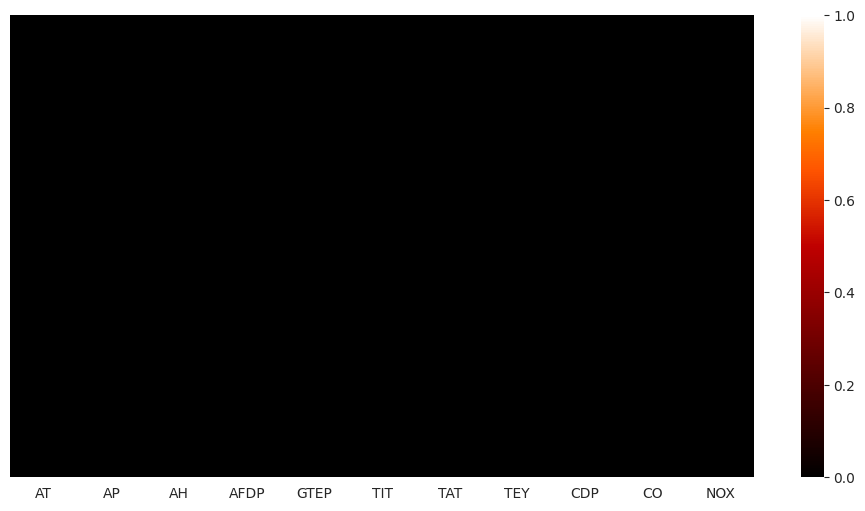

In [186]:
plt.rcParams['figure.figsize']=(12,6)
sns.heatmap(df.isna(), cmap =('gist_heat'), yticklabels=False)

In [187]:
#check for duplicate values
df[df.duplicated()].shape

(1396, 11)

In [188]:
df[df.duplicated()]

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY  \
15040  23.8470  1019.8  55.714  4.4283  27.716  1100.0  544.72  143.44   
15041  22.9600  1019.9  49.944  4.2861  26.871  1100.0  547.30  142.02   
15042  21.9080  1020.2  55.176  4.2455  26.688  1100.0  548.07  142.07   
15043  20.6070  1020.5  63.120  4.2571  27.062  1099.7  546.51  143.27   
15044  19.5490  1020.8  67.964  4.2976  27.133  1099.9  546.19  144.30   
...        ...     ...     ...     ...     ...     ...     ...     ...   
16431   9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61   
16432   7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78   
16433   7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19   
16434   7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74   
16435   6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58   

          CDP      CO     NOX  
15040  12.882  1.2034  73.220  
15041  12.823  1.2371  78.172  
15042  12.760  1.1908  78.051  
15043  12.801  1.1483  74.773  
15044  12.812  1.1333  72.686  
...       ...     ...     ...  
16431  10.400  4.5186  79.559  
16432  10.433  4.8470  79.917  
16433  10.483  7.9632  90.912  
16434  10.533  6.2494  93.227  
16435  10.583  4.9816  92.498  

[1396 rows x 11 columns]

In [189]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [190]:
df.nunique()

AT      12087
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [191]:
df.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988401
GTEP    0.976794
TIT     0.891062
AFDP    0.731912
AP      0.150855
AH     -0.123334
NOX    -0.154659
AT     -0.188749
CO     -0.541425
TAT    -0.704055
Name: TEY, dtype: float64

In [192]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

<Axes: title={'center': 'Distplot for TEY'}, xlabel='TEY', ylabel='Density'>

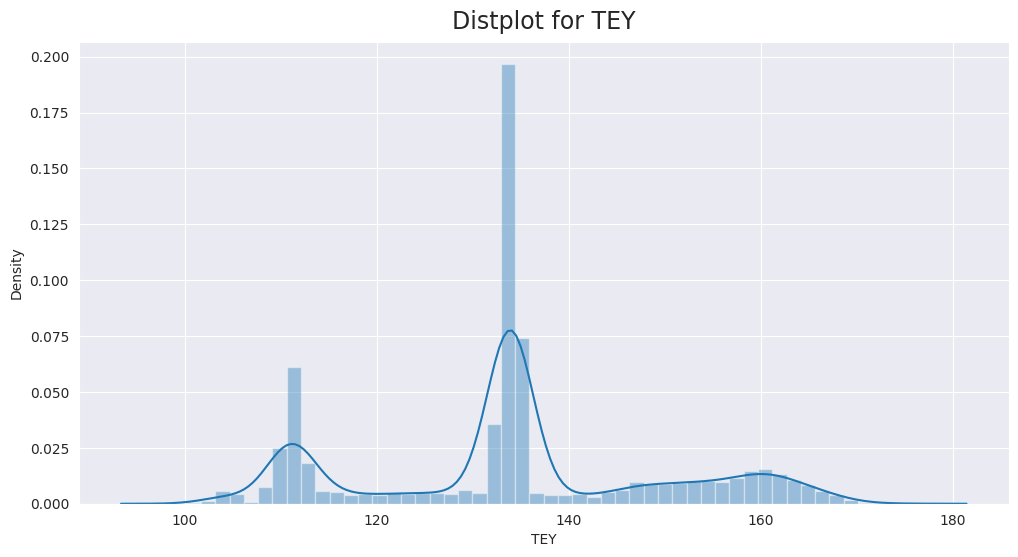

In [193]:
#Target variable
plt.title('Distplot for TEY', fontsize=17, y = 1.01)
sns.distplot(df['TEY'])

<Axes: title={'center': 'Distplot for AT'}, xlabel='AT', ylabel='Density'>

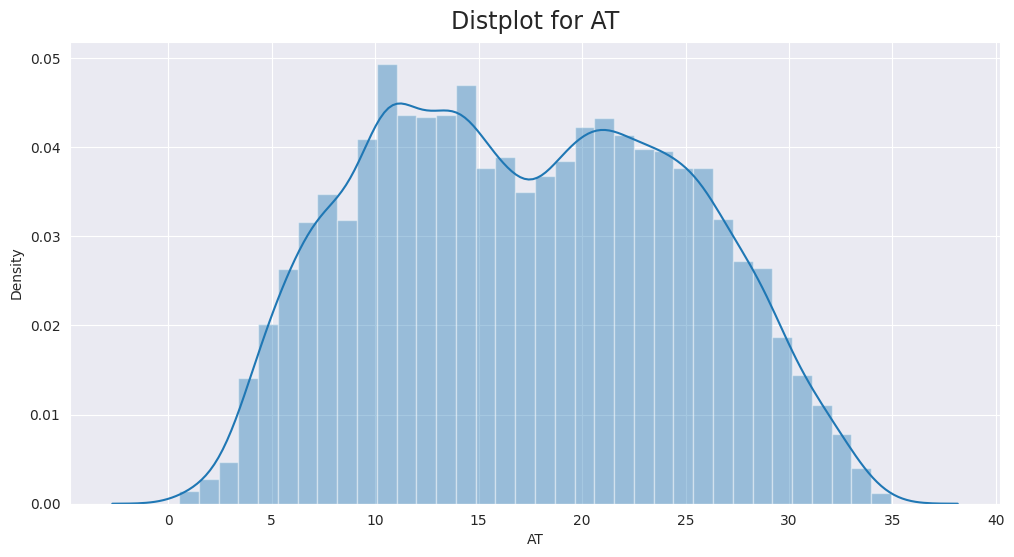

In [194]:
plt.title('Distplot for AT', fontsize=17, y = 1.01)
sns.distplot(df['AT'])

<Axes: title={'center': 'Distplot for AP'}, xlabel='AP', ylabel='Density'>

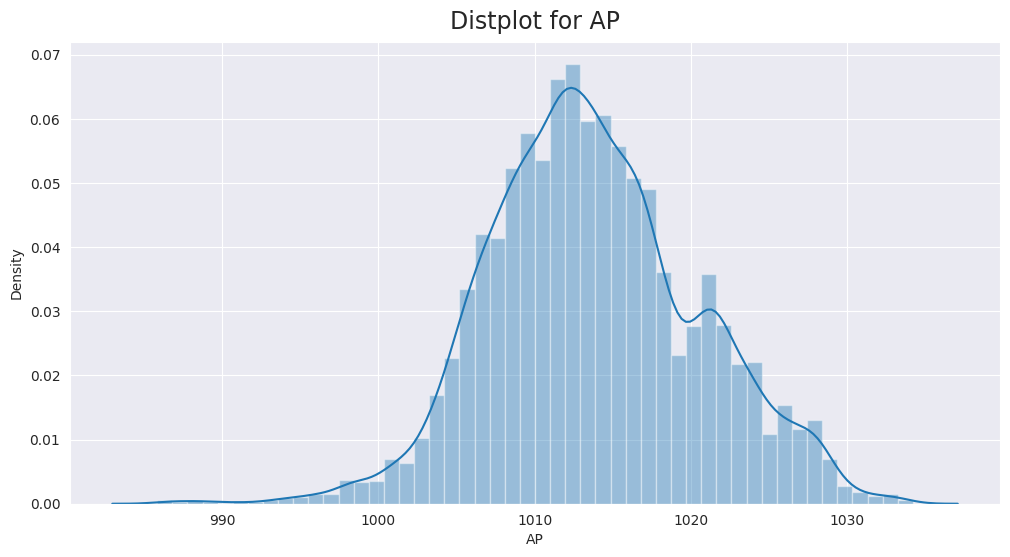

In [195]:
plt.title('Distplot for AP', fontsize=17, y = 1.01)
sns.distplot(df['AP'])

<Axes: title={'center': 'Distplot for AH'}, xlabel='AH', ylabel='Density'>

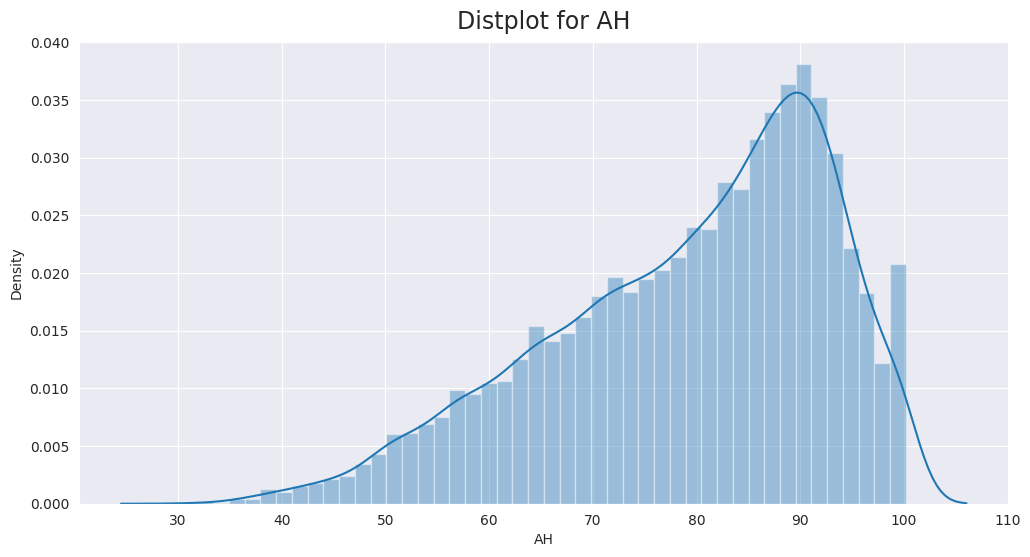

In [196]:
plt.title('Distplot for AH', fontsize=17, y = 1.01)
sns.distplot(df['AH'])

<Axes: title={'center': 'Distplot for AFDP'}, xlabel='AFDP', ylabel='Density'>

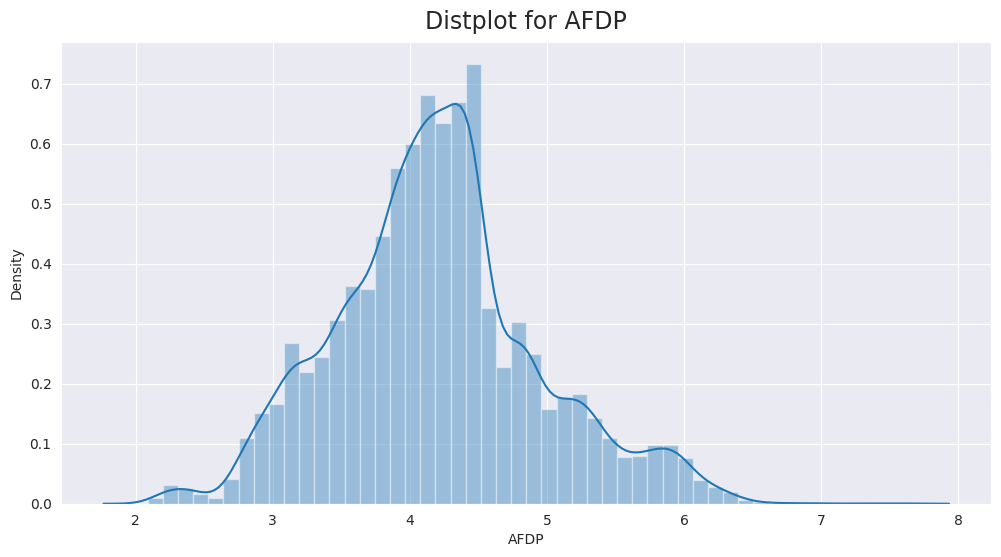

In [197]:
plt.title('Distplot for AFDP', fontsize=17, y = 1.01)
sns.distplot(df['AFDP'])

<Axes: title={'center': 'Distplot for GTEP'}, xlabel='GTEP', ylabel='Density'>

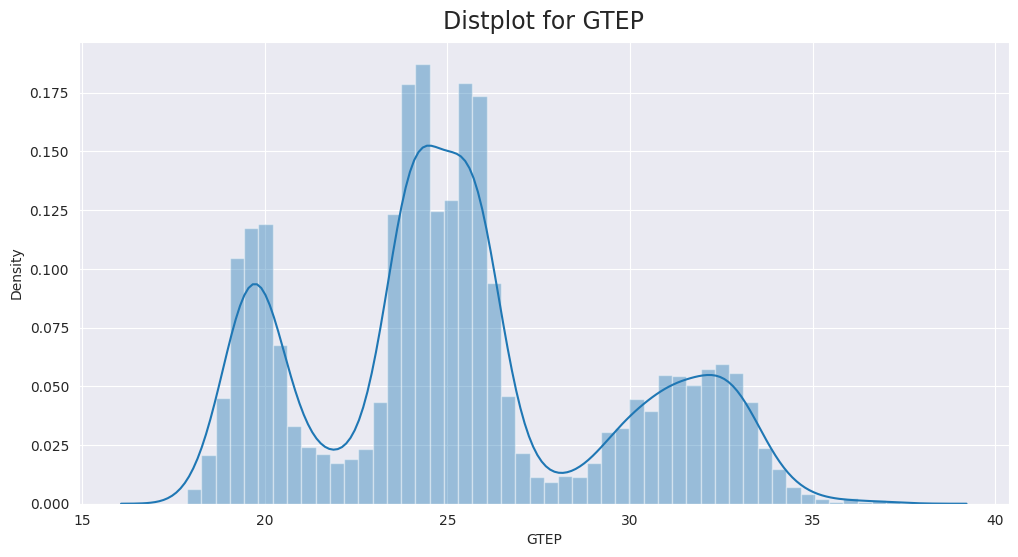

In [198]:
plt.title('Distplot for GTEP', fontsize=17, y = 1.01)
sns.distplot(df['GTEP'])

<Axes: title={'center': 'Distplot for TIT'}, xlabel='TIT', ylabel='Density'>

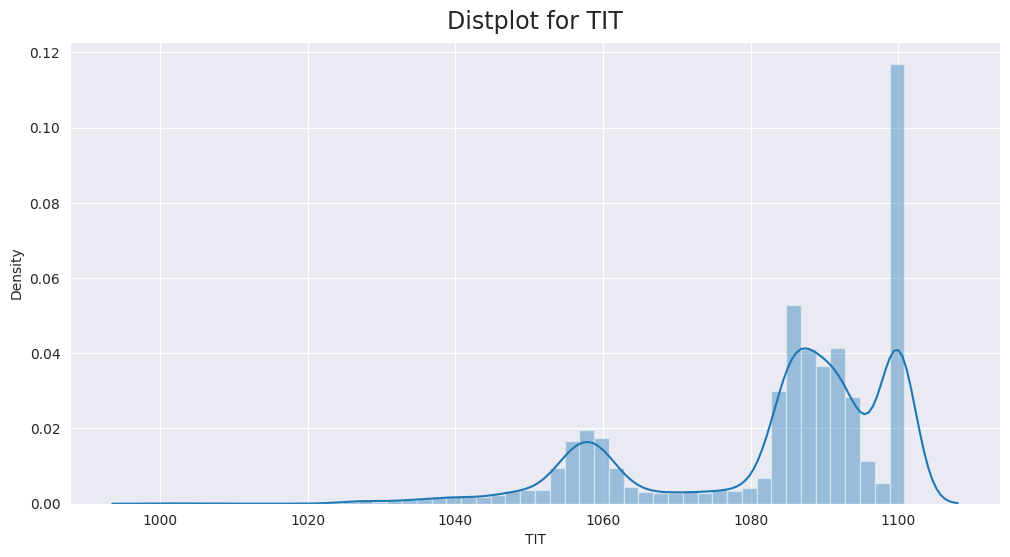

In [199]:
plt.title('Distplot for TIT', fontsize=17, y = 1.01)
sns.distplot(df['TIT'])

<Axes: title={'center': 'Distplot for TAT'}, xlabel='TAT', ylabel='Density'>

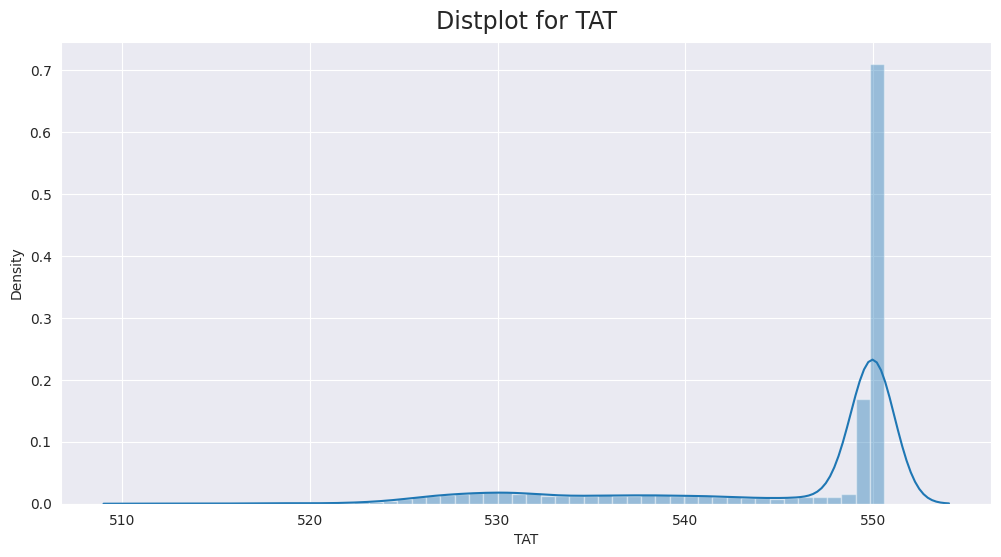

In [200]:
plt.title('Distplot for TAT', fontsize=17, y = 1.01)
sns.distplot(df['TAT'])

<Axes: title={'center': 'Distplot for CDP'}, xlabel='CDP', ylabel='Density'>

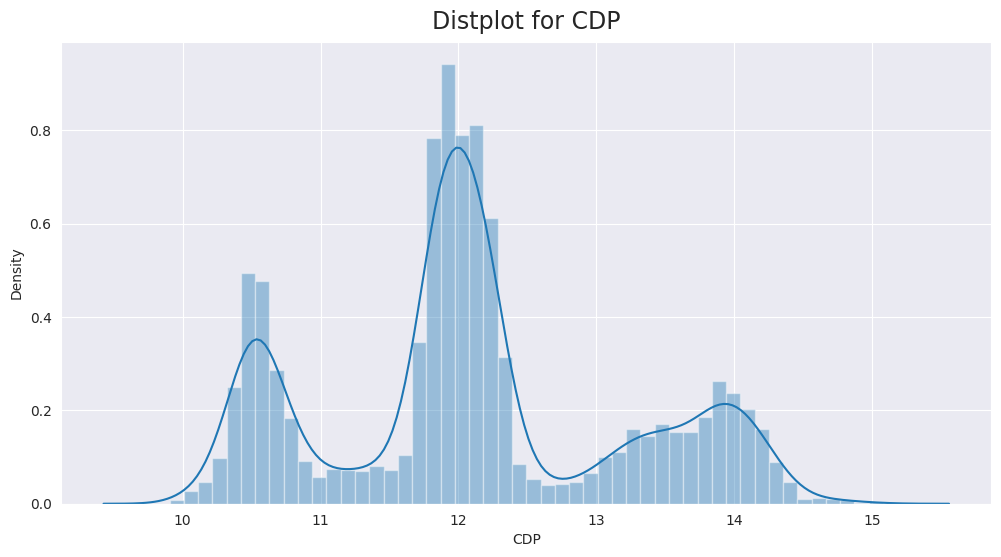

In [201]:
plt.title('Distplot for CDP', fontsize=17, y = 1.01)
sns.distplot(df['CDP'])

<Axes: title={'center': 'Distplot for CO'}, xlabel='CO', ylabel='Density'>

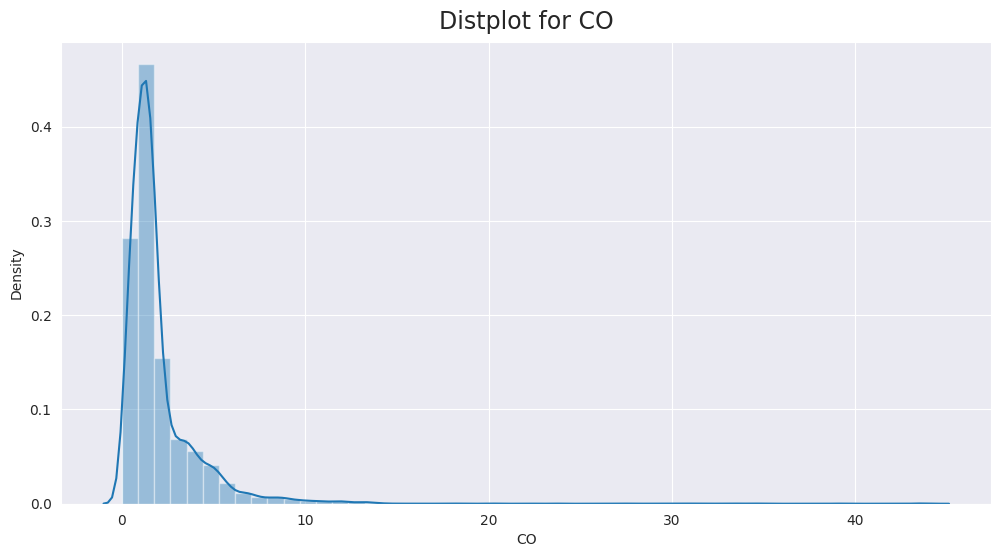

In [202]:
plt.title('Distplot for CO', fontsize=17, y = 1.01)
sns.distplot(df['CO'])

<Axes: title={'center': 'Distplot for NOX'}, xlabel='NOX', ylabel='Density'>

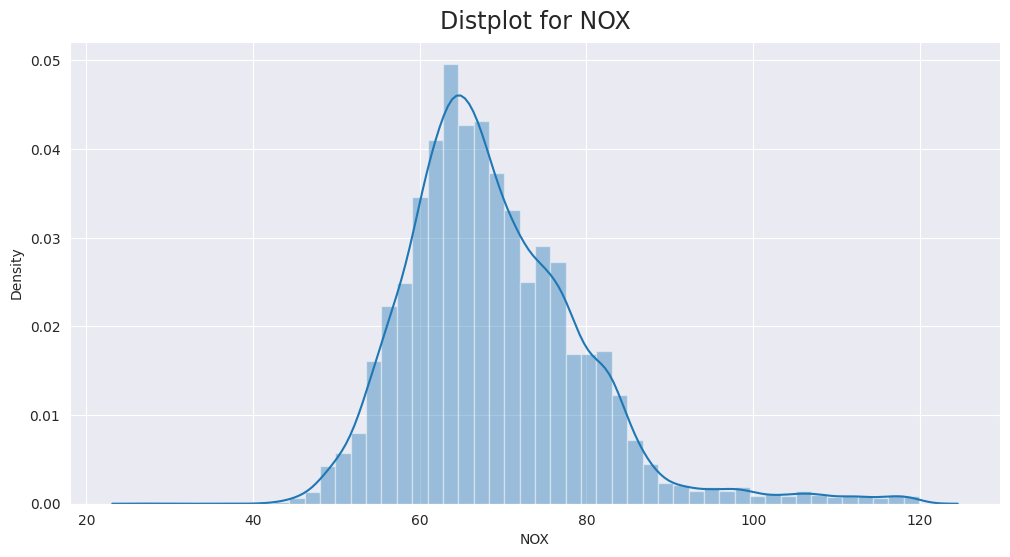

In [203]:
plt.title('Distplot for NOX', fontsize=17, y = 1.01)
sns.distplot(df['NOX'])

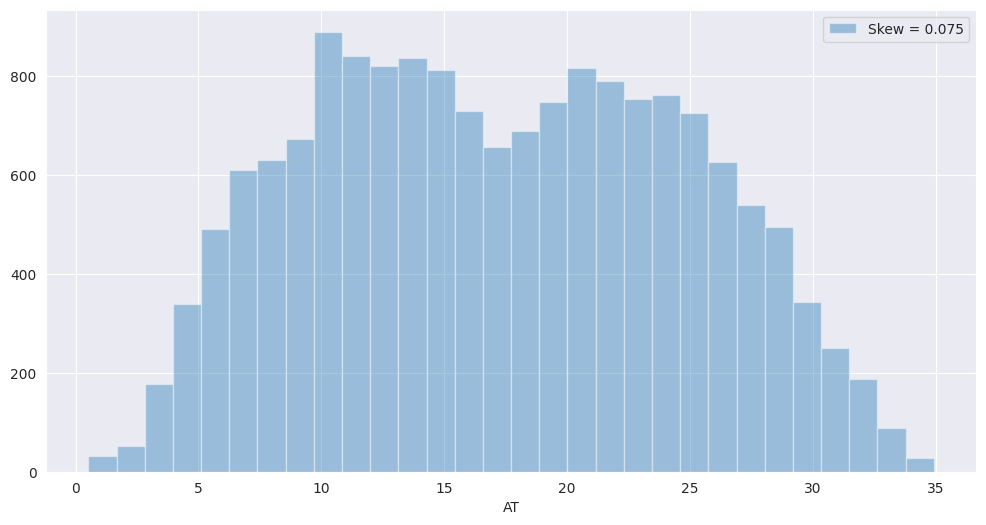

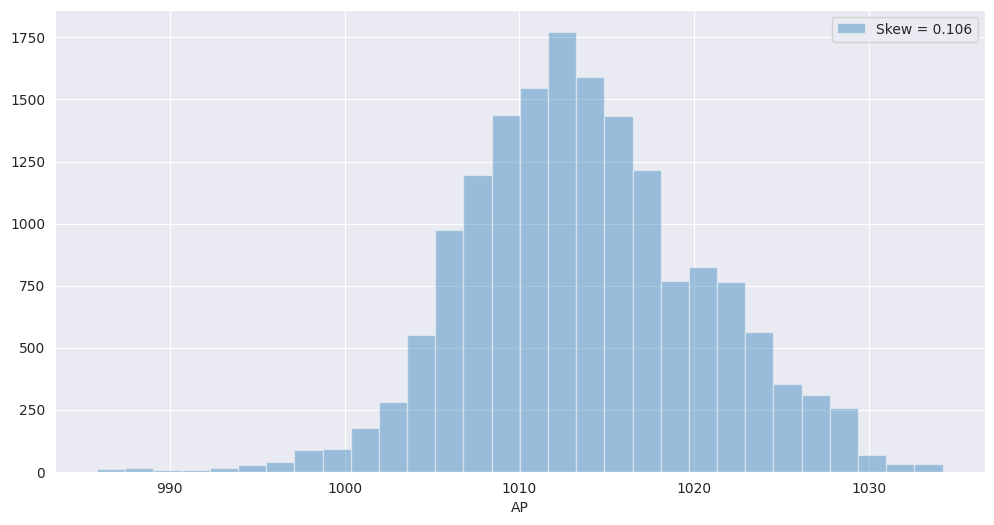

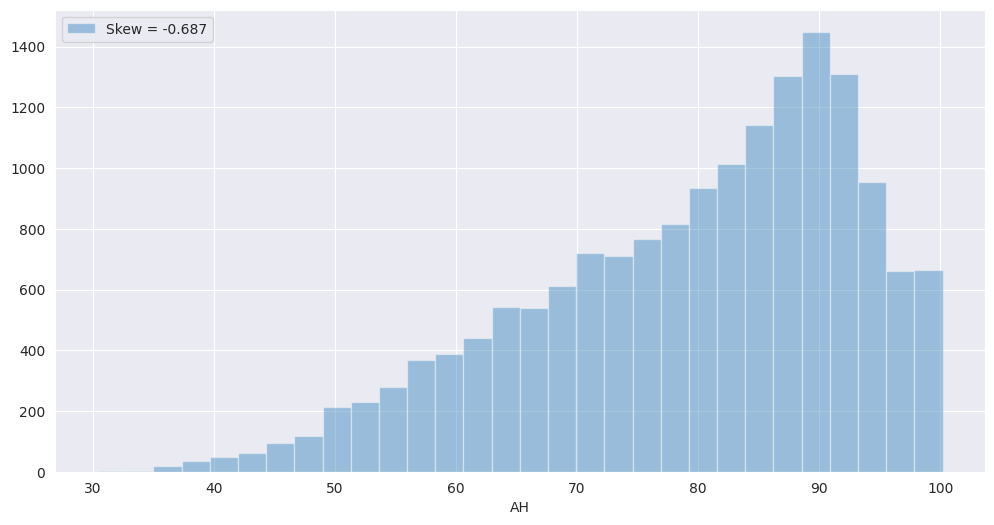

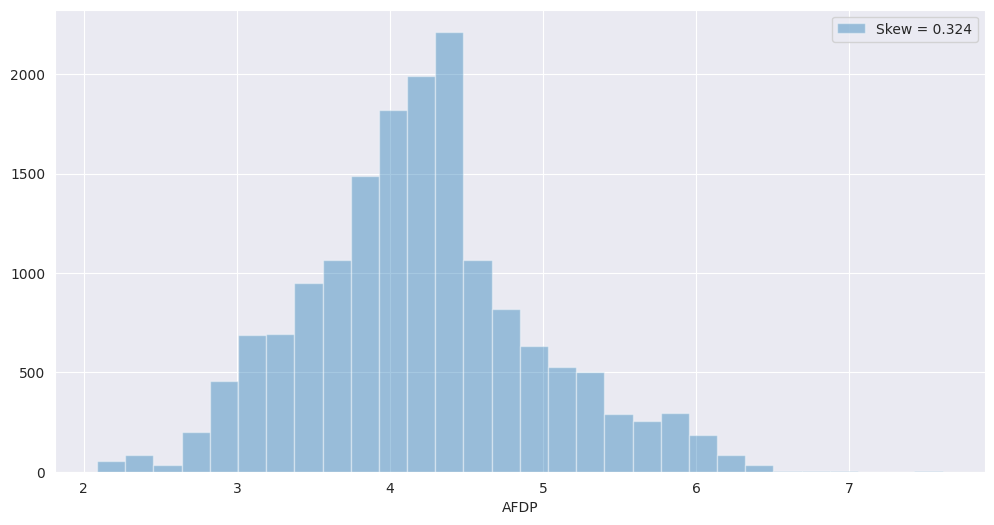

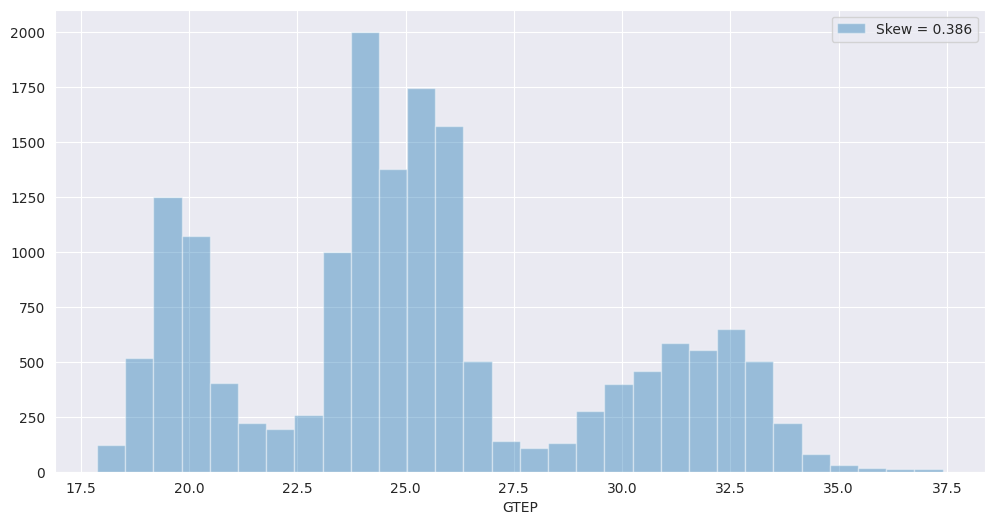

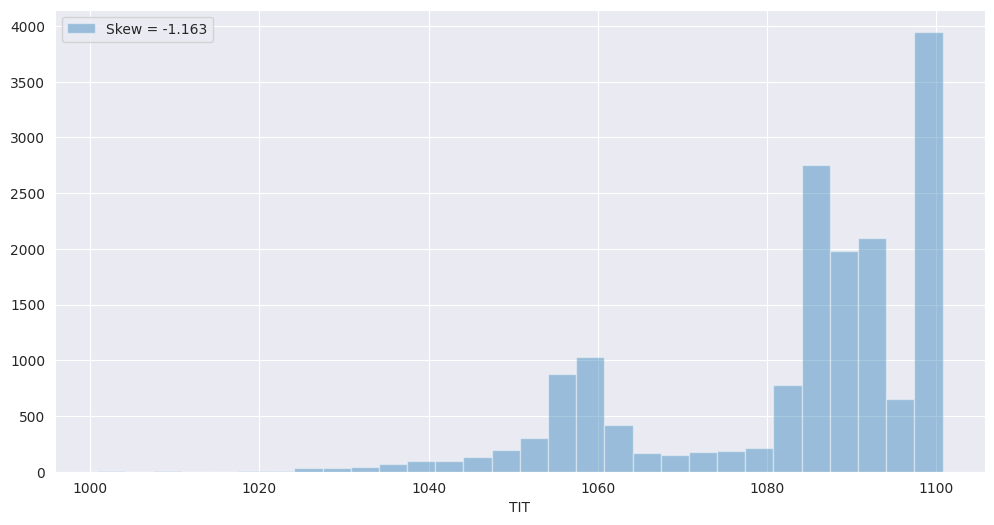

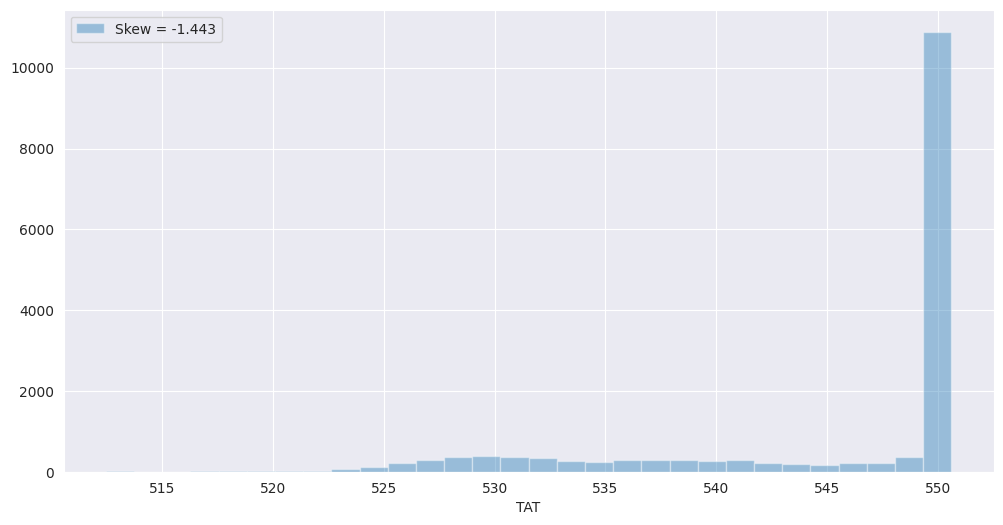

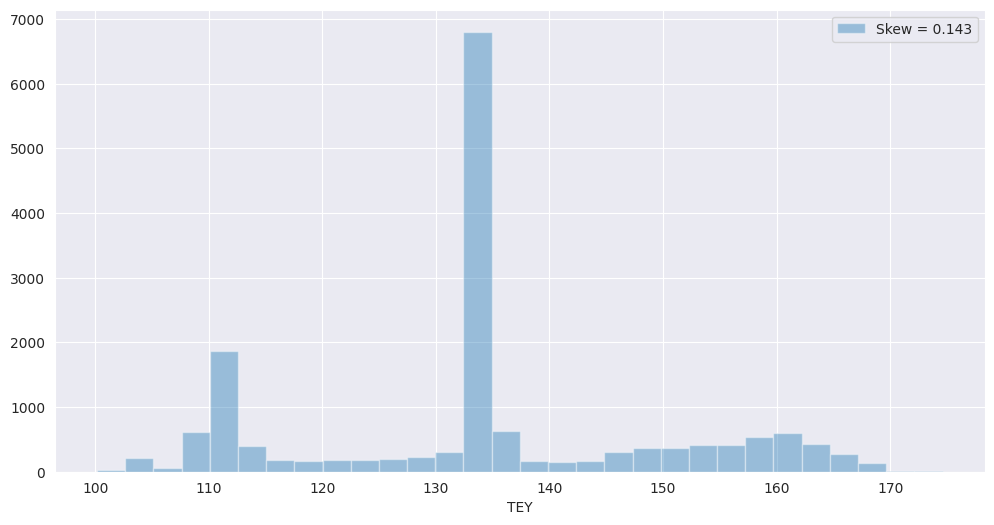

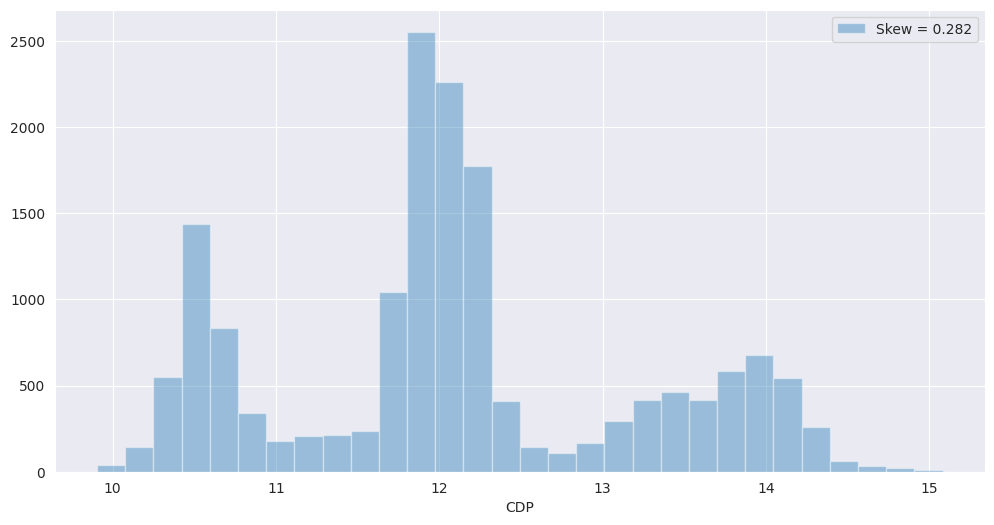

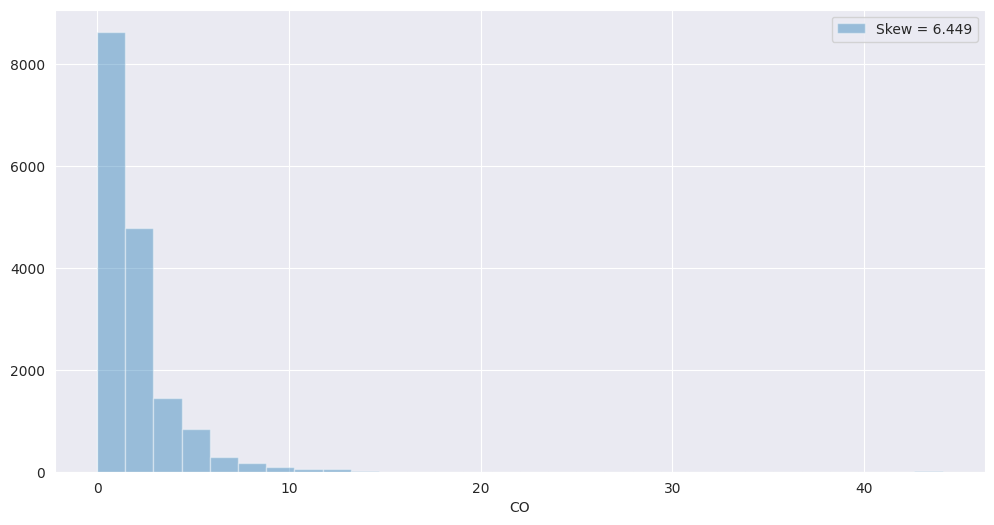

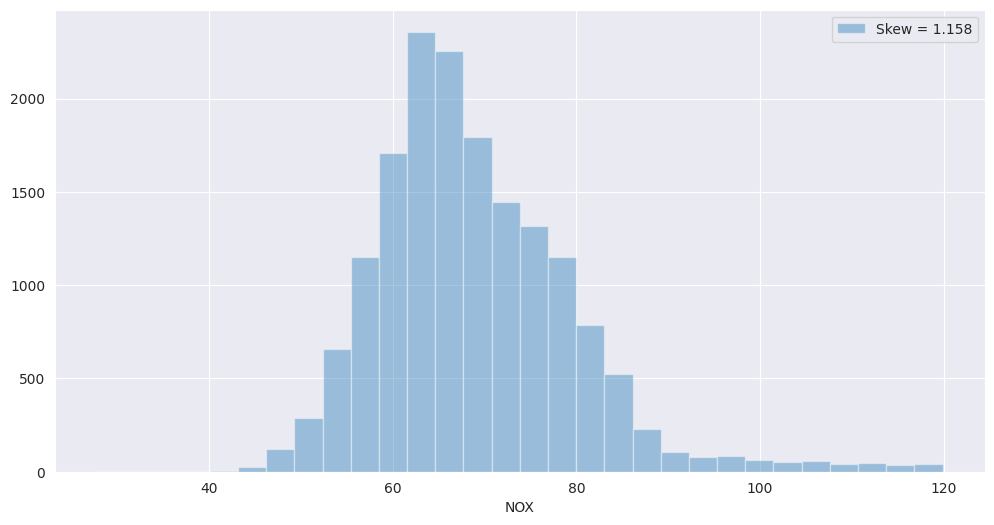

In [204]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [205]:
numerical_features

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

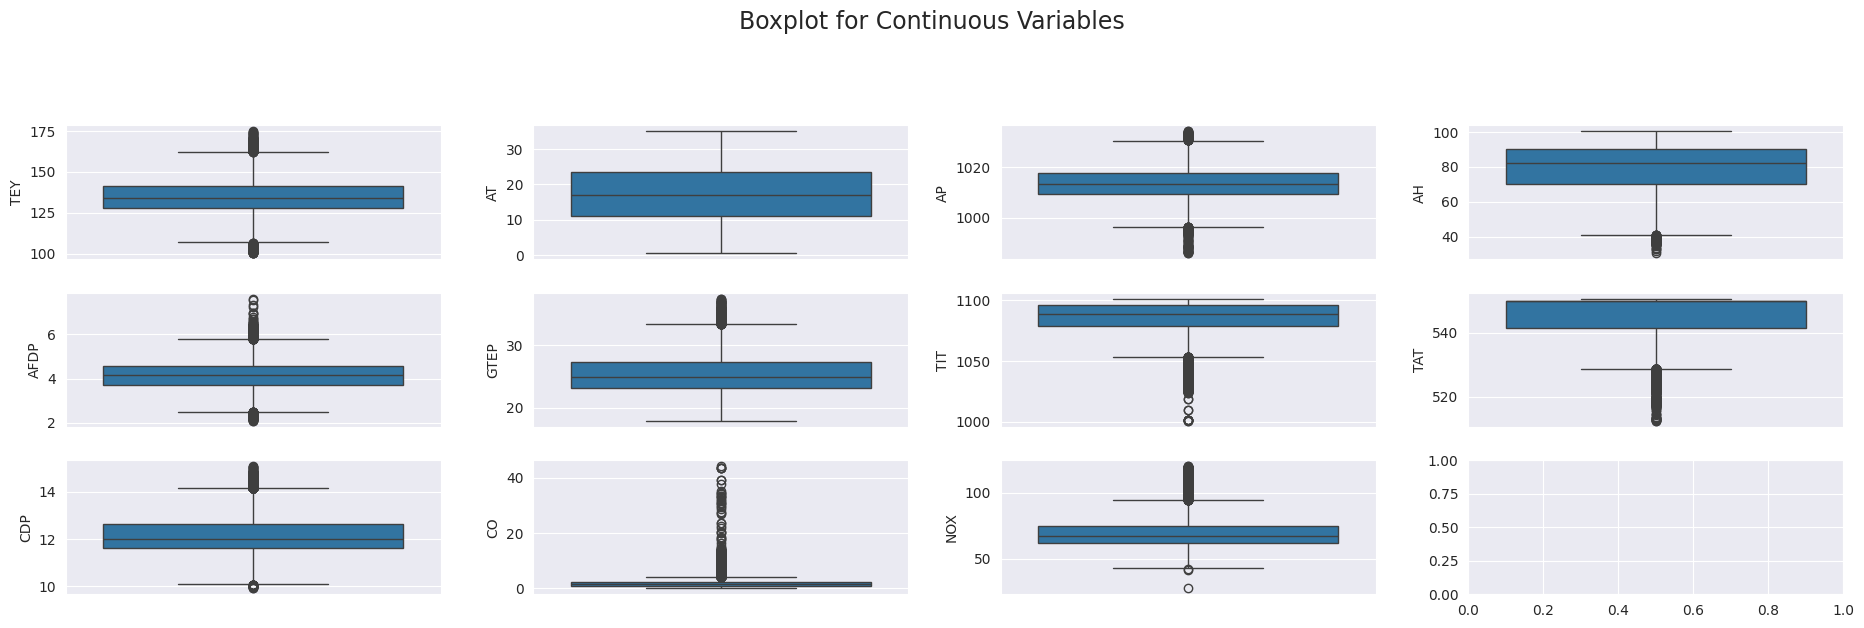

In [206]:
#check for outliers
fig, ax=plt.subplots(3,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(df.TEY, ax=ax[0,0])
sns.boxplot(df.AT, ax=ax[0,1])
sns.boxplot(df.AP, ax=ax[0,2])
sns.boxplot(df.AH, ax=ax[0,3])
sns.boxplot(df.AFDP, ax=ax[1,0])
sns.boxplot(df.GTEP, ax=ax[1,1])
sns.boxplot(df.TIT, ax=ax[1,2])
sns.boxplot(df.TAT, ax=ax[1,3])
sns.boxplot(df.CDP, ax=ax[2,0])
sns.boxplot(df.CO, ax=ax[2,1])
sns.boxplot(df.NOX, ax=ax[2,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

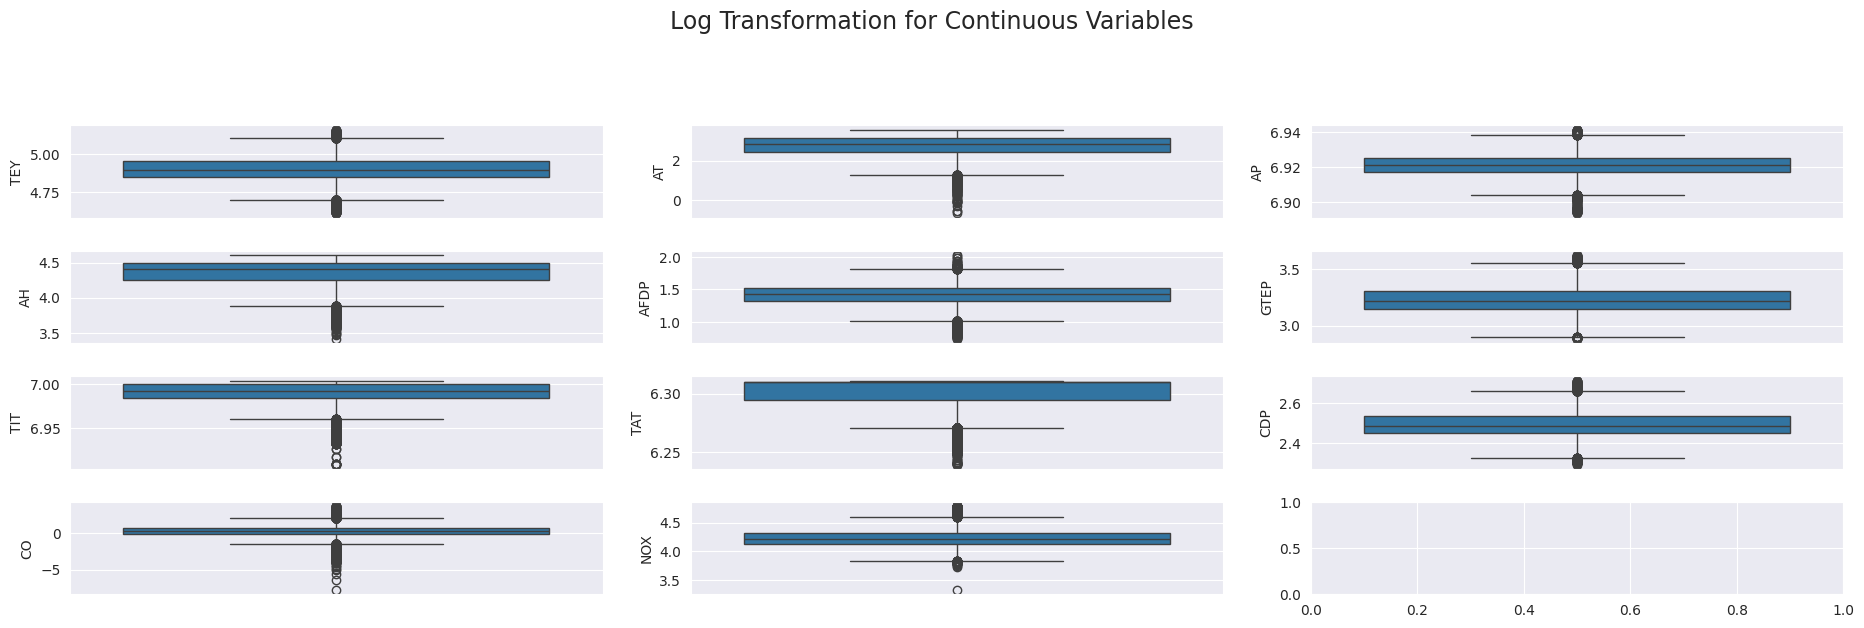

In [207]:
import numpy as np
fig, ax=plt.subplots(4,3, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.log(df.TEY), ax=ax[0,0])
sns.boxplot(np.log(df.AT), ax=ax[0,1])
sns.boxplot(np.log(df.AP), ax=ax[0,2])
sns.boxplot(np.log(df.AH), ax=ax[1,0])
sns.boxplot(np.log(df.AFDP), ax=ax[1,1])
sns.boxplot(np.log(df.GTEP), ax=ax[1,2])
sns.boxplot(np.log(df.TIT), ax=ax[2,0])
sns.boxplot(np.log(df.TAT), ax=ax[2,1])
sns.boxplot(np.log(df.CDP), ax=ax[2,2])
sns.boxplot(np.log(df.CO), ax=ax[3,0])
sns.boxplot(np.log(df.NOX), ax=ax[3,1])
plt.suptitle("Log Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

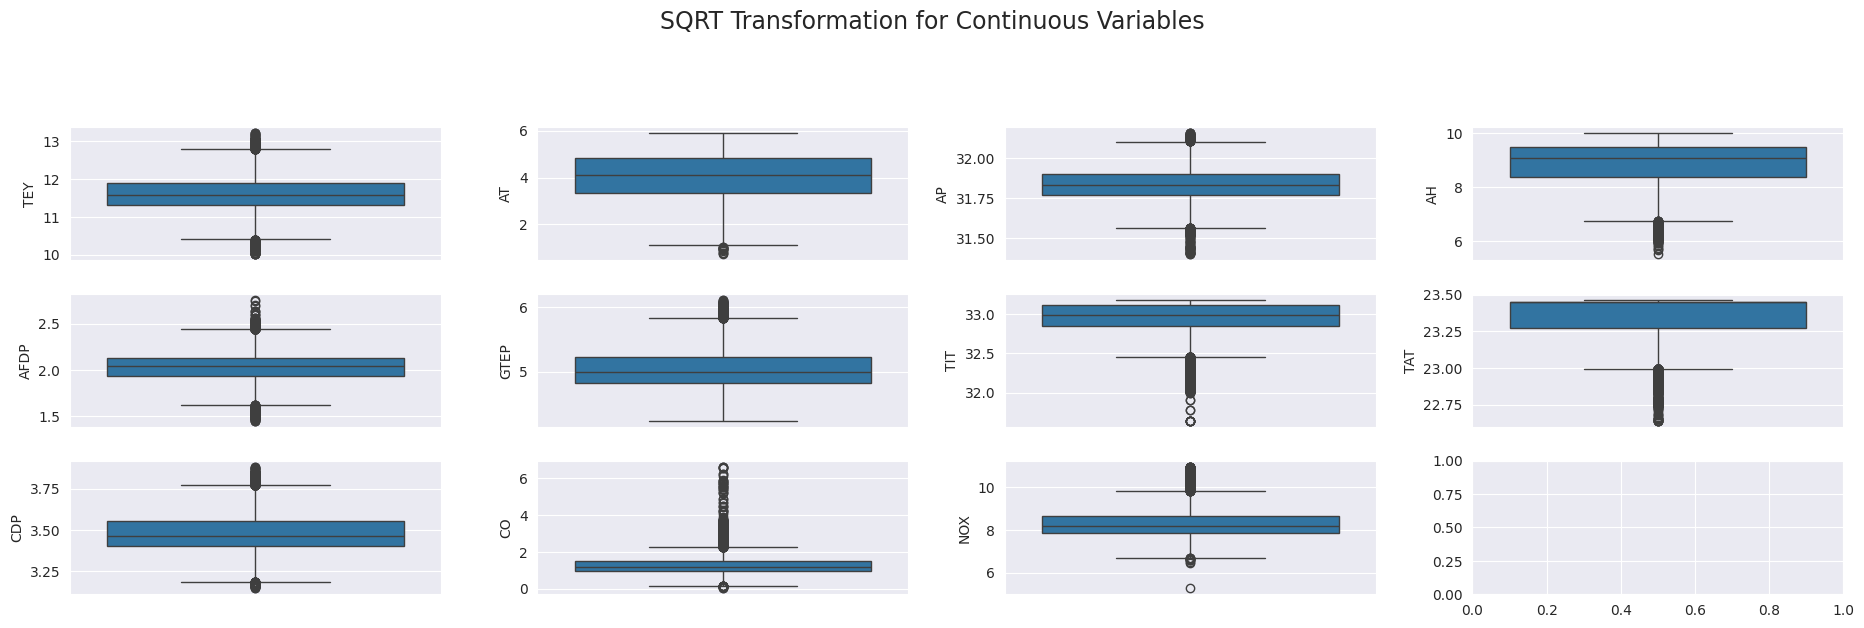

In [208]:
fig, ax=plt.subplots(3,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.sqrt(df.TEY), ax=ax[0,0])
sns.boxplot(np.sqrt(df.AT), ax=ax[0,1])
sns.boxplot(np.sqrt(df.AP), ax=ax[0,2])
sns.boxplot(np.sqrt(df.AH), ax=ax[0,3])
sns.boxplot(np.sqrt(df.AFDP), ax=ax[1,0])
sns.boxplot(np.sqrt(df.GTEP), ax=ax[1,1])
sns.boxplot(np.sqrt(df.TIT), ax=ax[1,2])
sns.boxplot(np.sqrt(df.TAT), ax=ax[1,3])
sns.boxplot(np.sqrt(df.CDP), ax=ax[2,0])
sns.boxplot(np.sqrt(df.CO), ax=ax[2,1])
sns.boxplot(np.sqrt(df.NOX), ax=ax[2,2])
plt.suptitle("SQRT Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

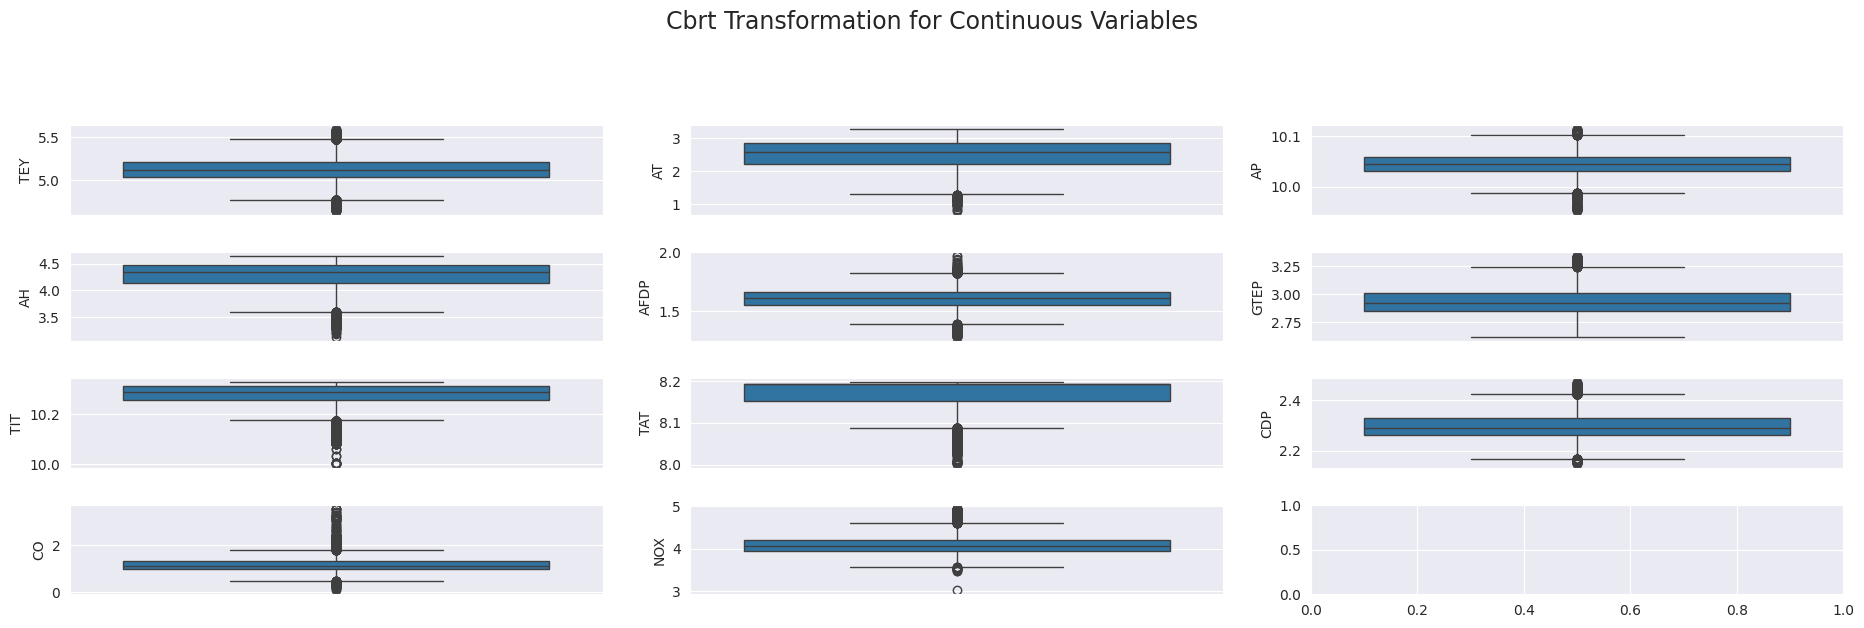

In [209]:
fig, ax=plt.subplots(4,3, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.cbrt(df.TEY), ax=ax[0,0])
sns.boxplot(np.cbrt(df.AT), ax=ax[0,1])
sns.boxplot(np.cbrt(df.AP), ax=ax[0,2])
sns.boxplot(np.cbrt(df.AH), ax=ax[1,0])
sns.boxplot(np.cbrt(df.AFDP), ax=ax[1,1])
sns.boxplot(np.cbrt(df.GTEP), ax=ax[1,2])
sns.boxplot(np.cbrt(df.TIT), ax=ax[2,0])
sns.boxplot(np.cbrt(df.TAT), ax=ax[2,1])
sns.boxplot(np.cbrt(df.CDP), ax=ax[2,2])
sns.boxplot(np.cbrt(df.CO), ax=ax[3,0])
sns.boxplot(np.cbrt(df.NOX), ax=ax[3,1])
plt.suptitle("Cbrt Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

Text(0.5, 1.0, 'Histogram of the Target Column')

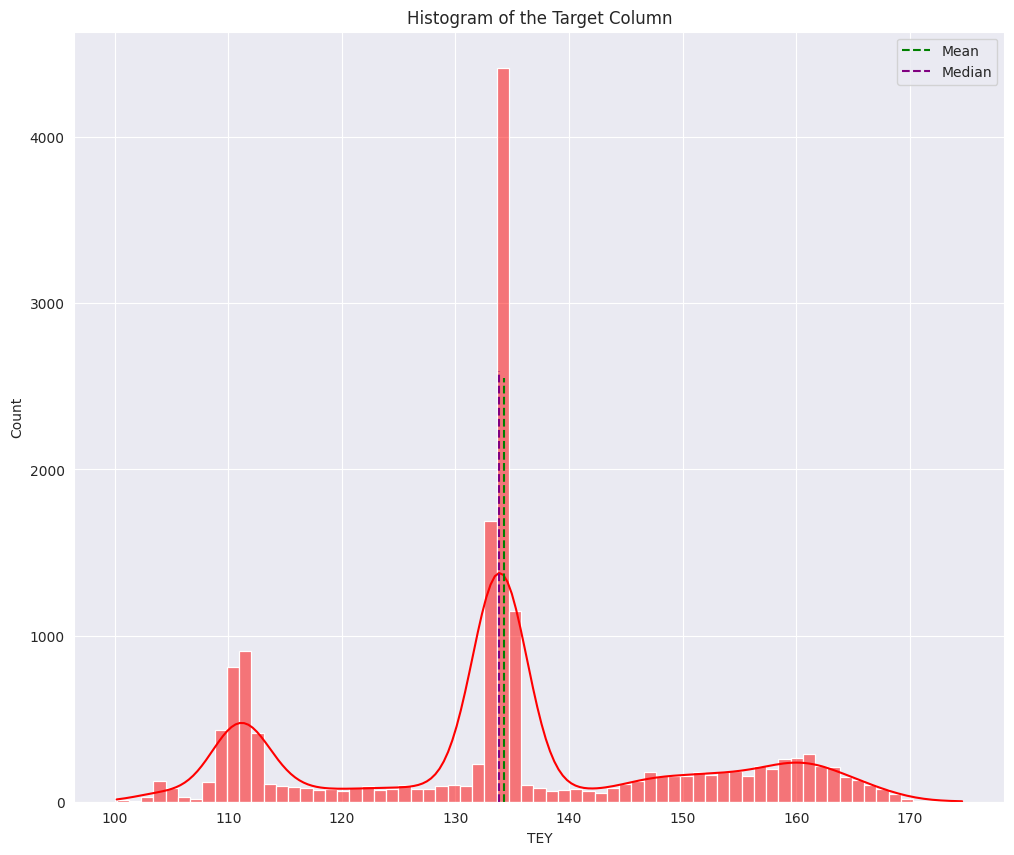

In [171]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
sns.histplot(data=df,x="TEY",color="red",kde=True)
plt.axvline(x=df["TEY"].mean(),ymax=0.55,color="green",linestyle='--',label="Mean")
plt.axvline(x=df["TEY"].median(),ymax=0.56,color="purple",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Target Column")

Text(0.5, 1.0, 'Cumulative of the Target Column')

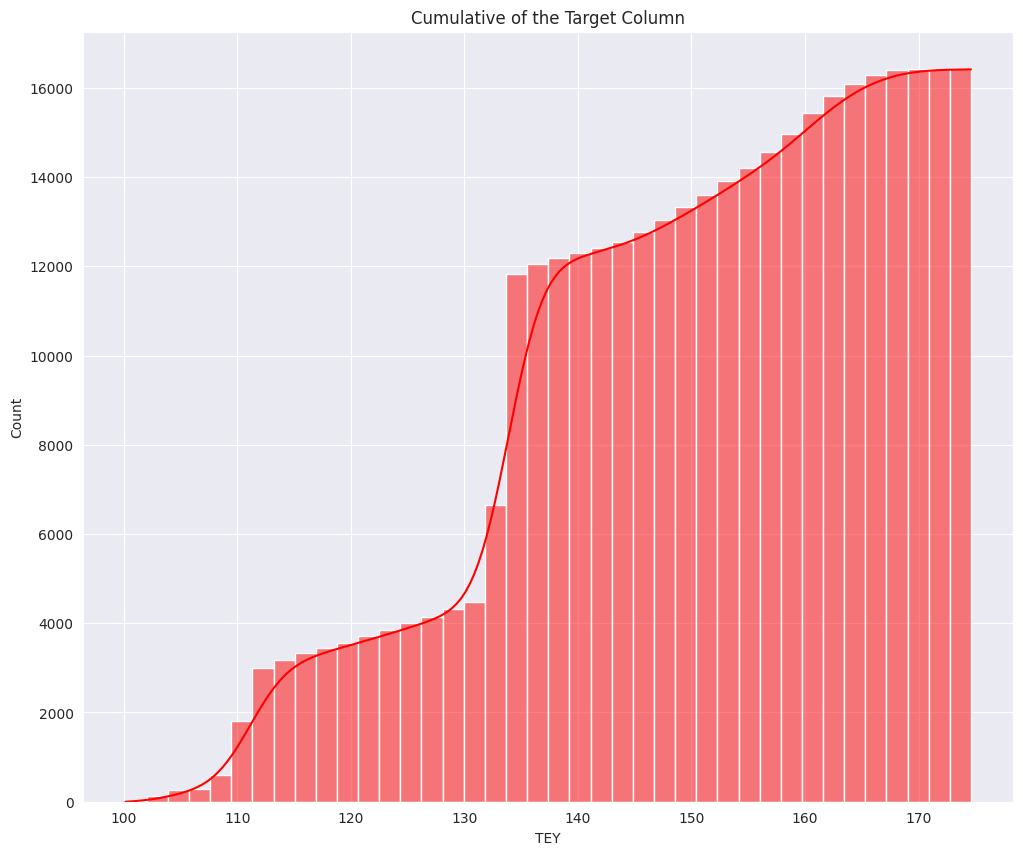

In [210]:
plt.figure(figsize = (12,10))
sns.histplot(df["TEY"],kde=True,bins=40,color="red",cumulative=True)
plt.title("Cumulative of the Target Column")

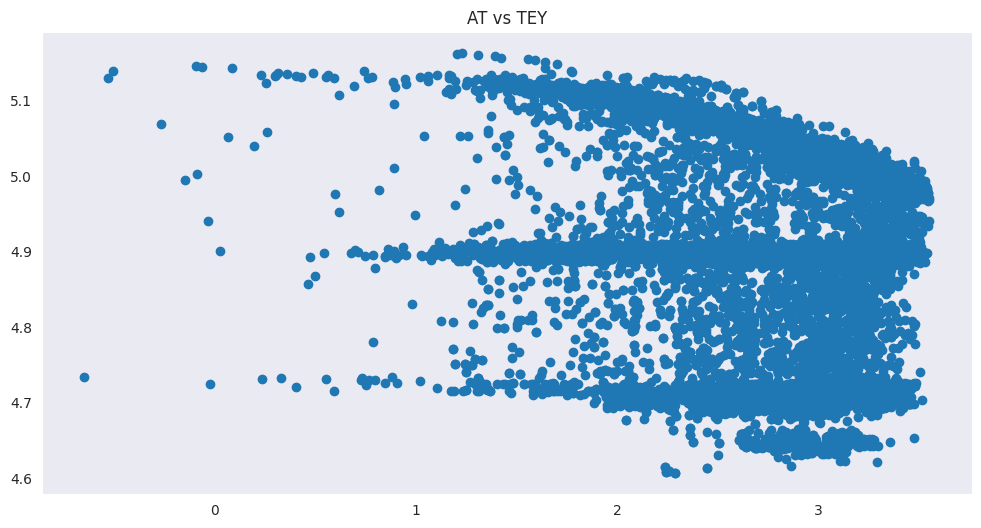

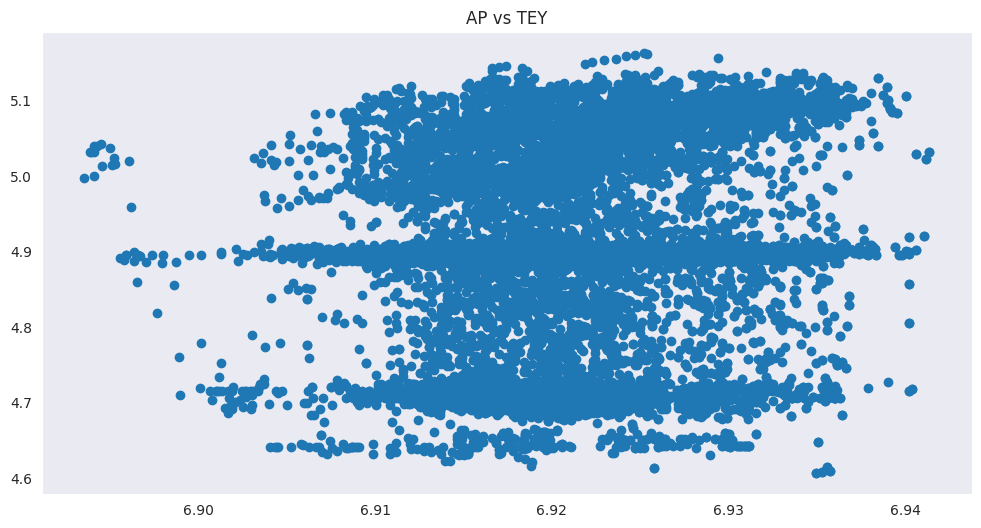

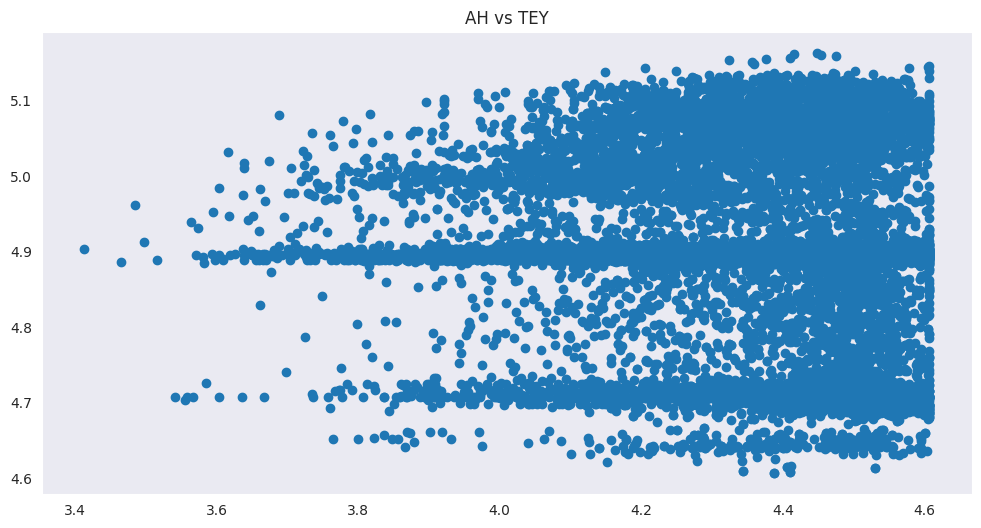

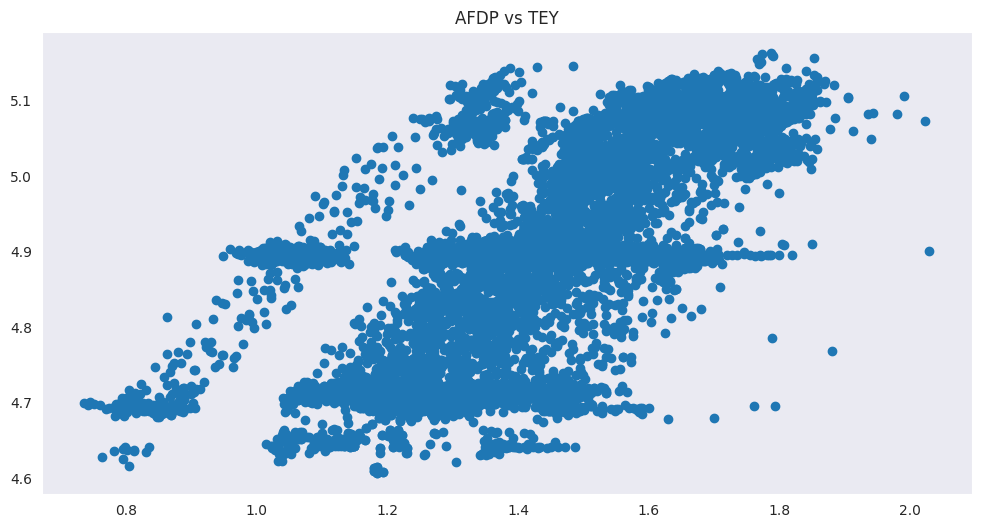

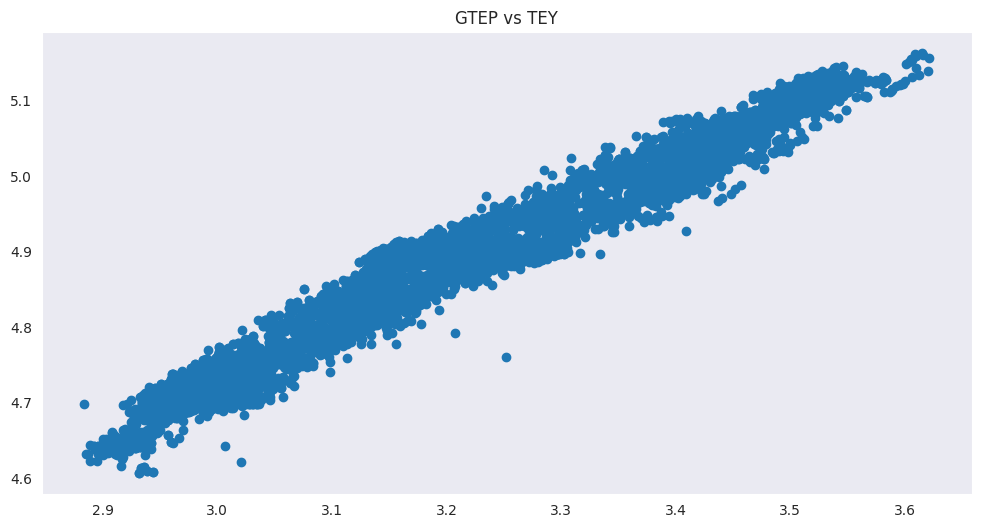

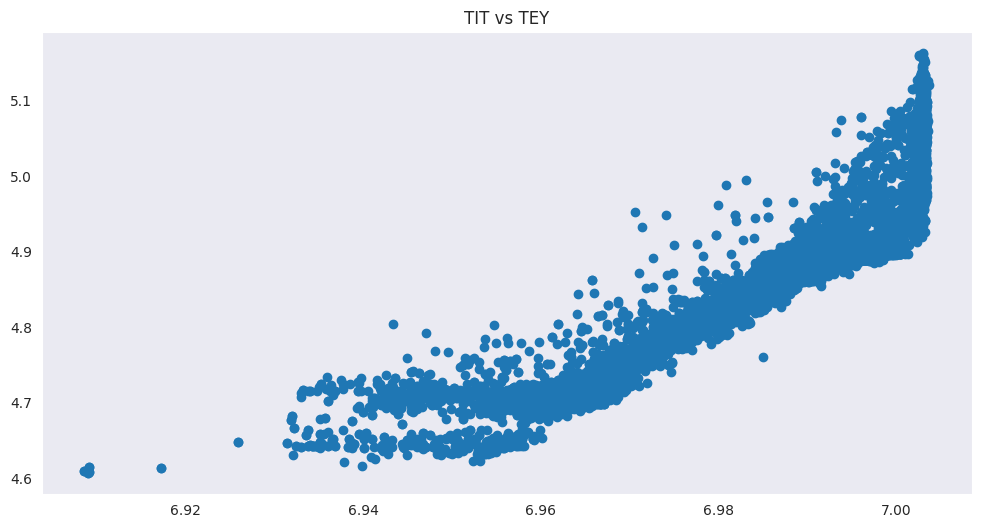

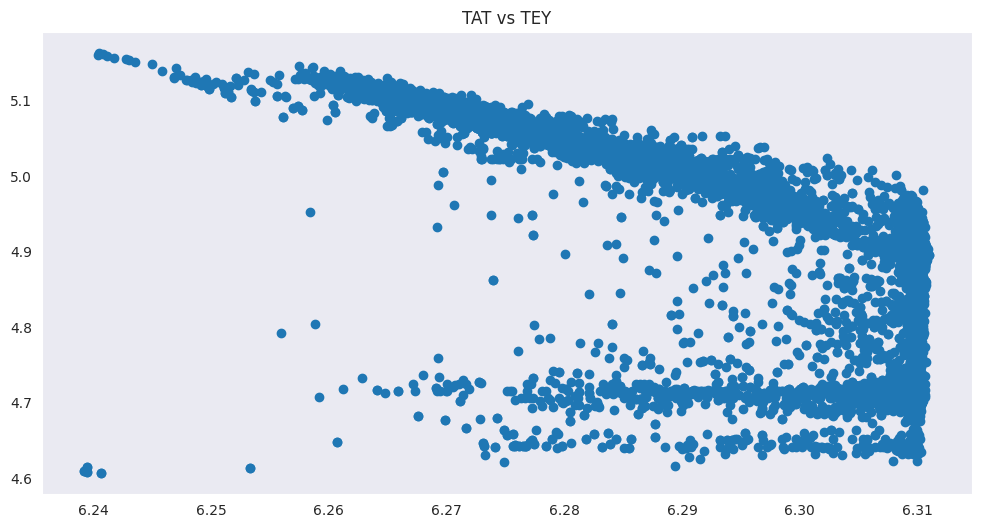

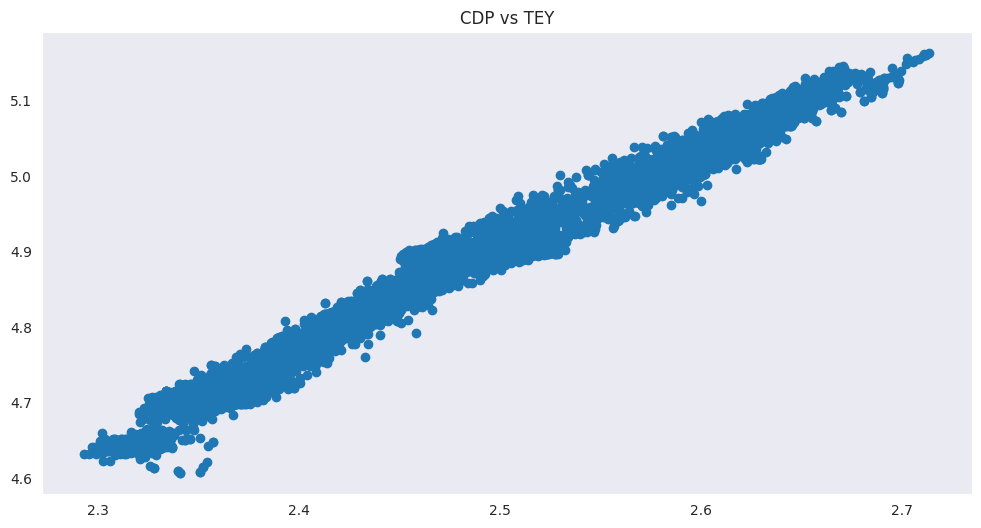

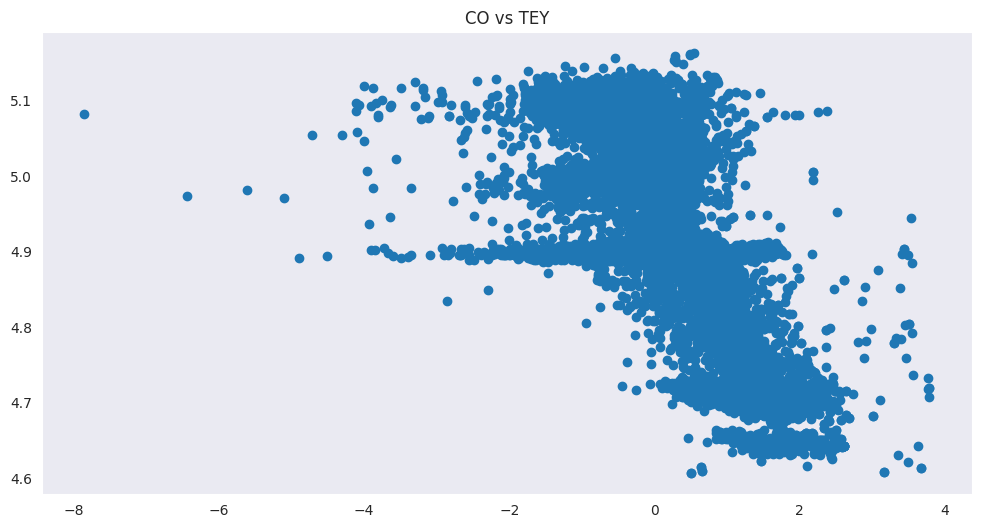

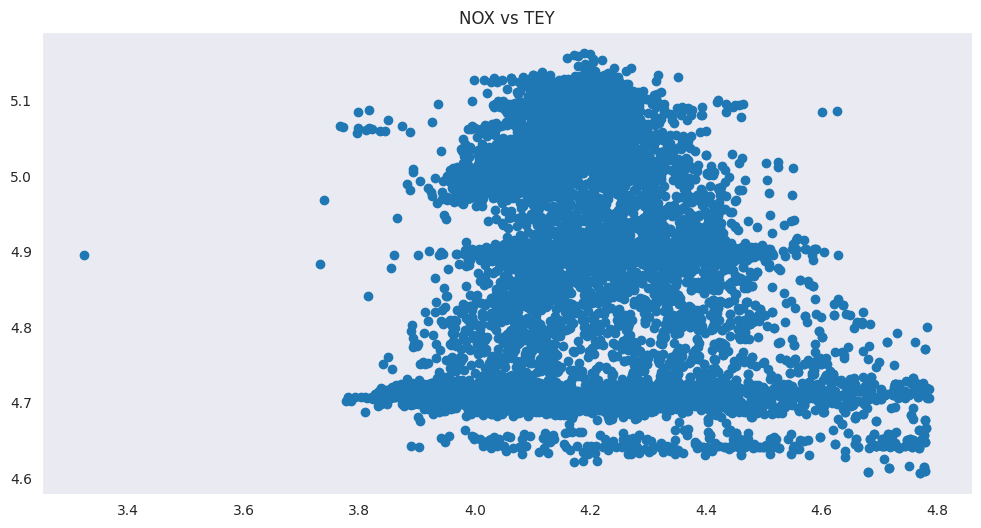

In [211]:
for i in df.columns:
    if i!="TEY":
        plt.scatter(np.log(df[i]), np.log(df['TEY']))
        plt.title(i+ ' vs TEY')
        plt.grid()
        plt.show()

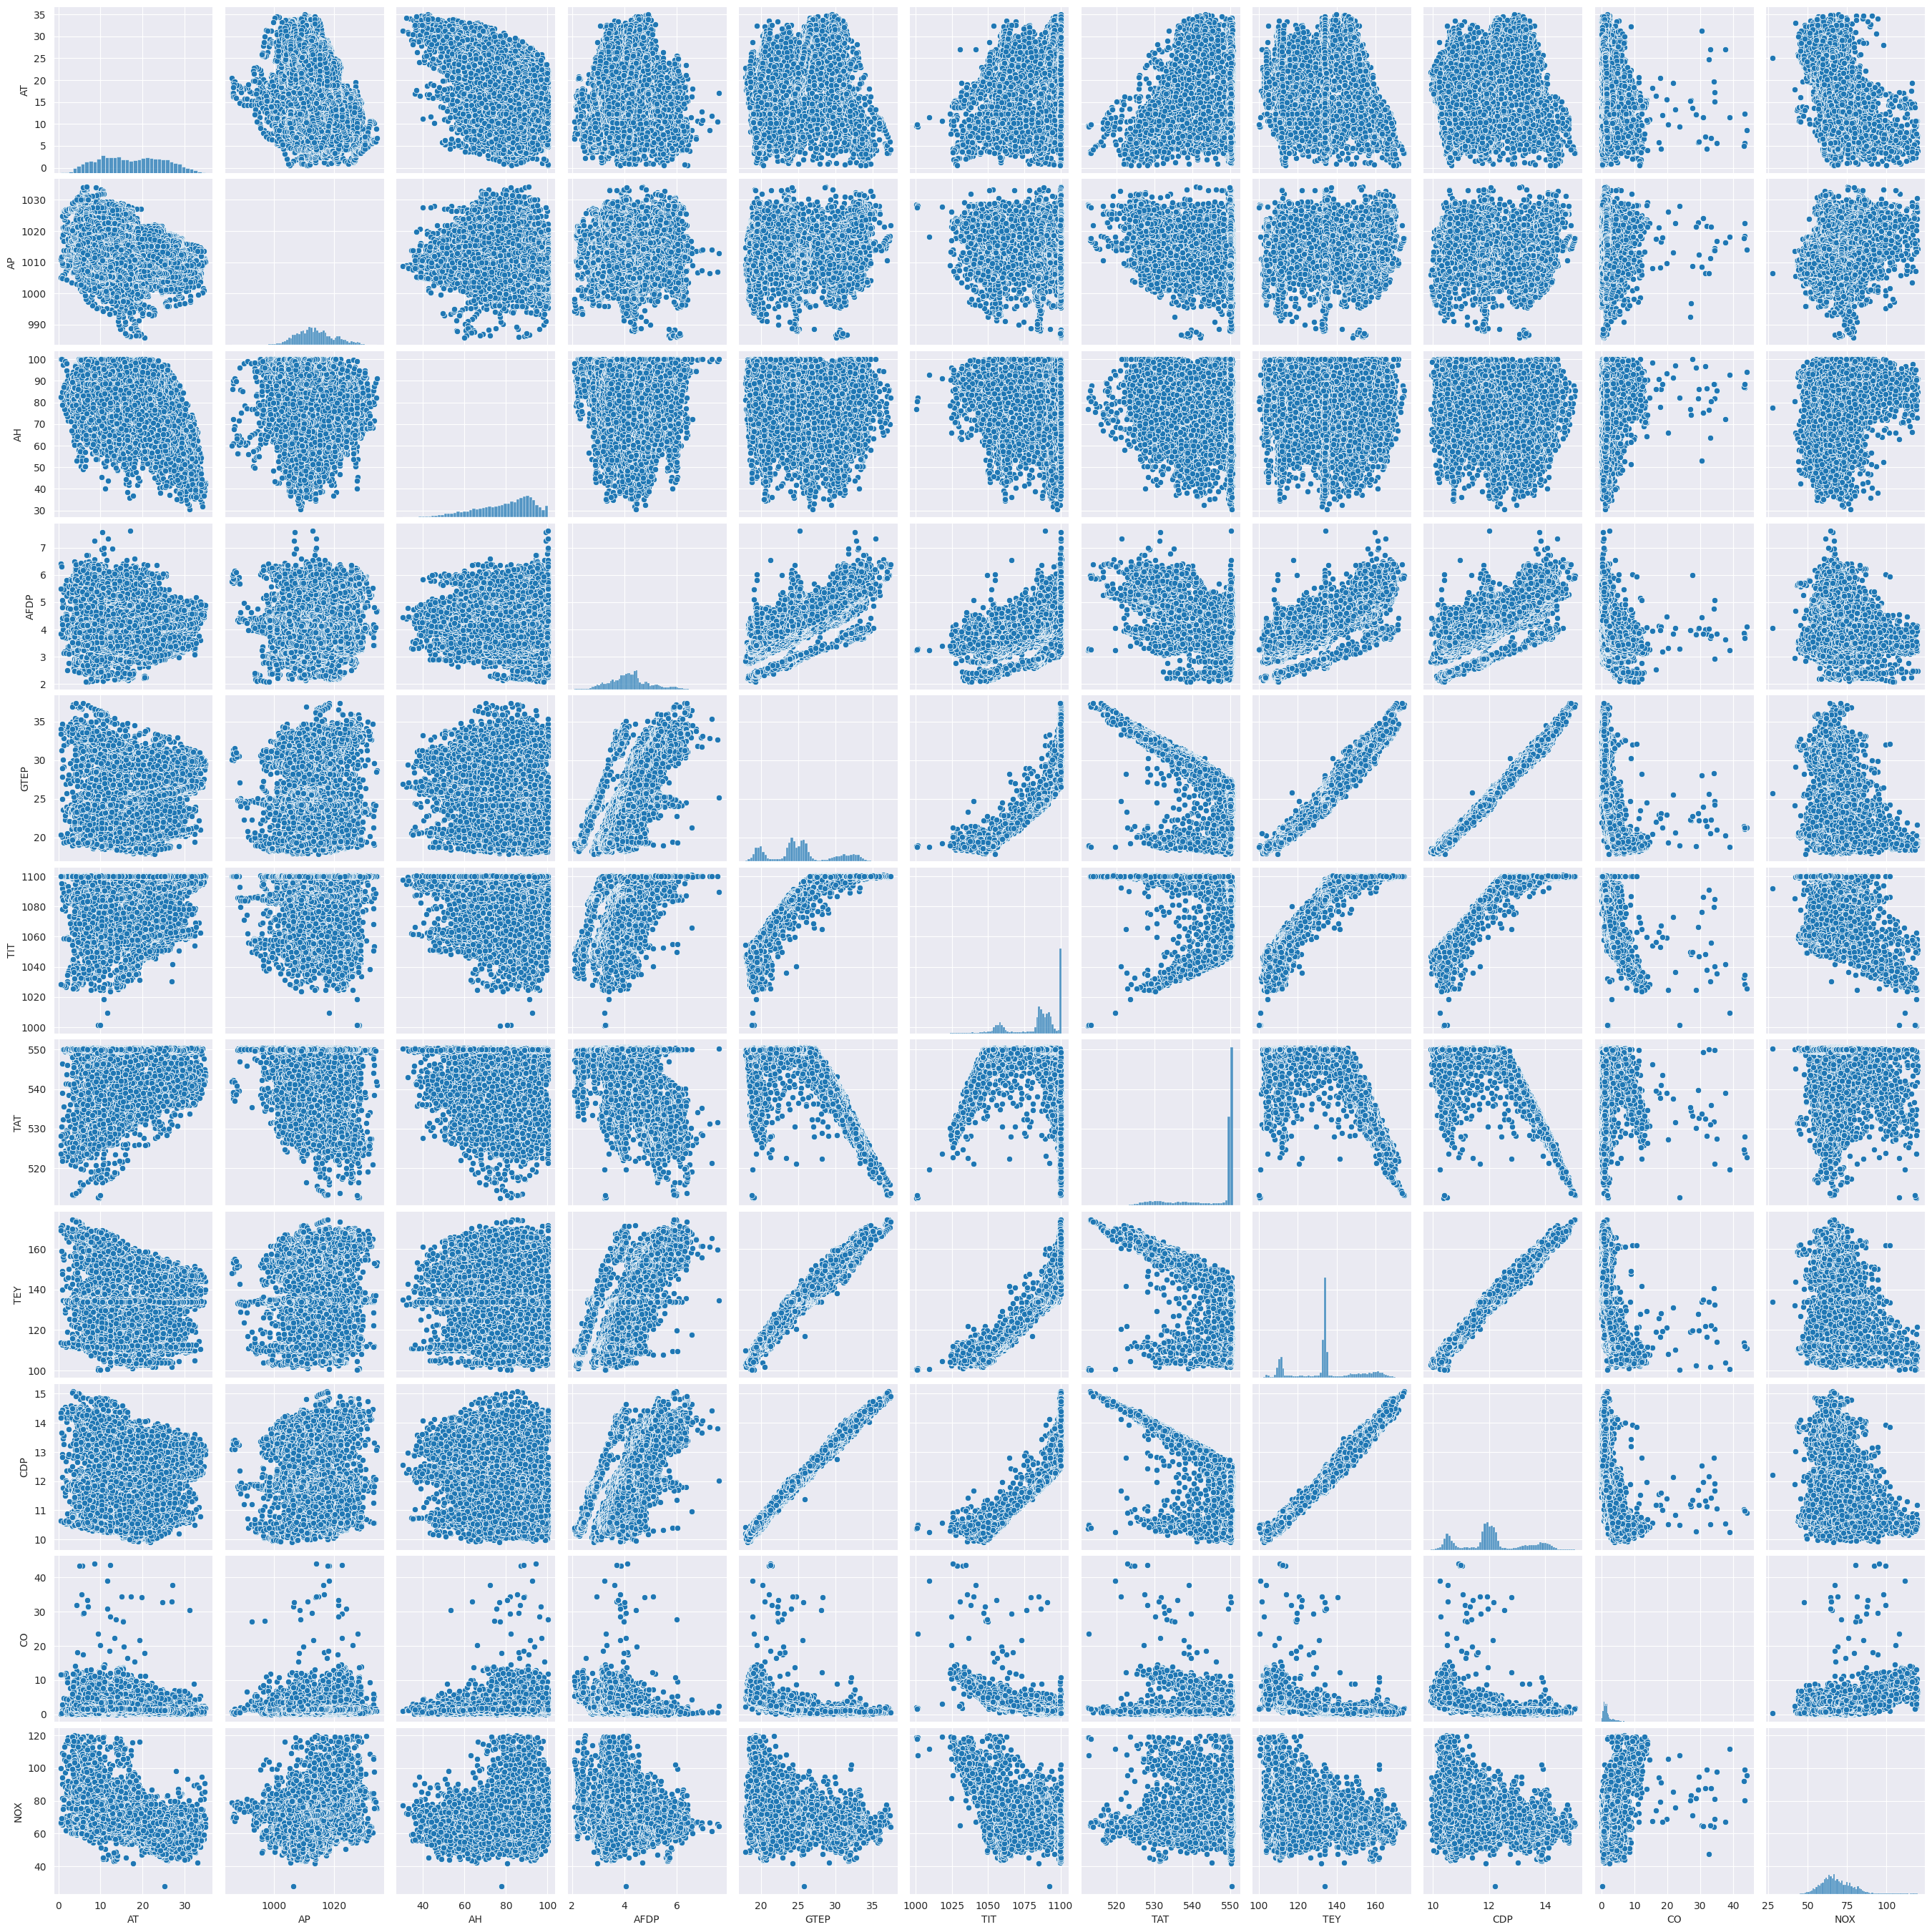

In [212]:
sns.pairplot(df)

<Axes: >

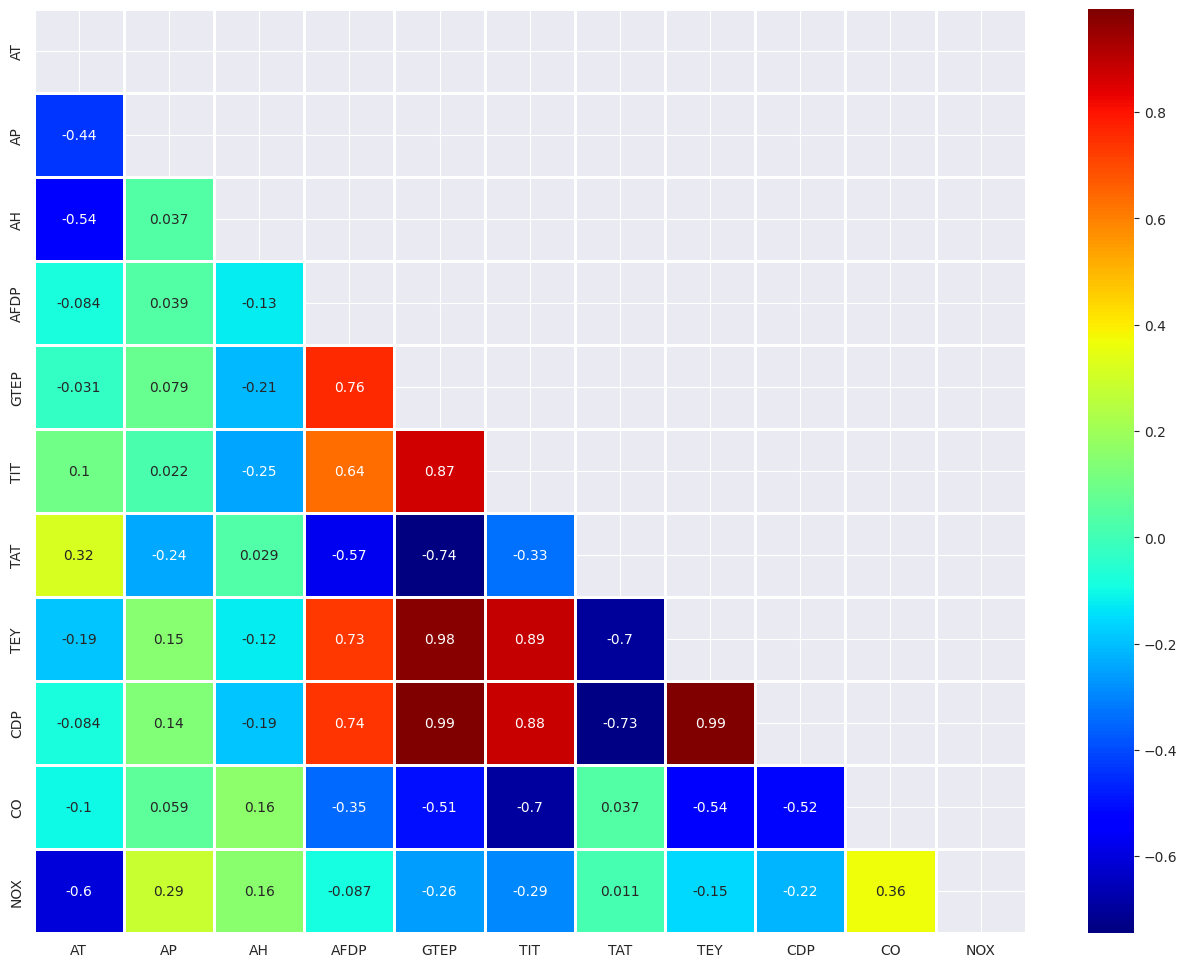

In [213]:
plt.figure(figsize=(16,12))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

In [214]:
!pip install ppscore




In [215]:
import ppscore as PPS
score = PPS.matrix(df)
score_s = score[score['y']=='TEY']
score_s.sort_values(by="ppscore", ascending=False)

x    y   ppscore            case  is_valid_score               metric  \
84    TEY  TEY  1.000000  predict_itself            True                 None   
95    CDP  TEY  0.872895      regression            True  mean absolute error   
51   GTEP  TEY  0.831712      regression            True  mean absolute error   
62    TIT  TEY  0.769473      regression            True  mean absolute error   
73    TAT  TEY  0.234680      regression            True  mean absolute error   
40   AFDP  TEY  0.196569      regression            True  mean absolute error   
106    CO  TEY  0.110827      regression            True  mean absolute error   
7      AT  TEY  0.000000      regression            True  mean absolute error   
18     AP  TEY  0.000000      regression            True  mean absolute error   
29     AH  TEY  0.000000      regression            True  mean absolute error   
117   NOX  TEY  0.000000      regression            True  mean absolute error   

     baseline_score  model_score                    model  
84         0.000000     1.000000                     None  
95        11.354142     1.443168  DecisionTreeRegressor()  
51        11.354142     1.910761  DecisionTreeRegressor()  
62        11.354142     2.617439  DecisionTreeRegressor()  
73        11.354142     8.689556  DecisionTreeRegressor()  
40        11.354142     9.122270  DecisionTreeRegressor()  
106       11.354142    10.095799  DecisionTreeRegressor()  
7         11.354142    15.418602  DecisionTreeRegressor()  
18        11.354142    12.793800  DecisionTreeRegressor()  
29        11.354142    16.454585  DecisionTreeRegressor()  
117       11.354142    13.949384  DecisionTreeRegressor()

Text(0.5, 1.01, 'PPScore of each feature with Target variable')

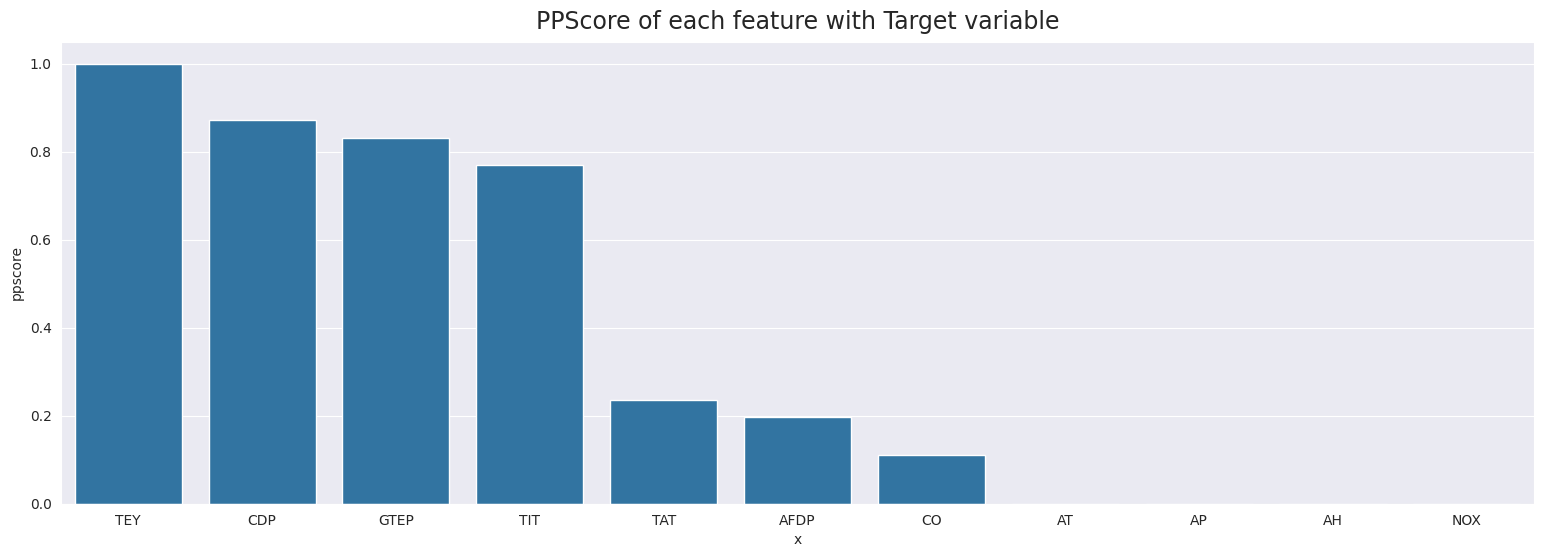

In [216]:

plt.rcParams['figure.figsize']=(19,6)
sns.barplot(x='x', y='ppscore', data=score_s.sort_values(by='ppscore', ascending=False))
plt.title("PPScore of each feature with Target variable", fontsize=17, y=1.01)

In [217]:
x = df.drop('TEY', axis=1)
y = df[["TEY"]]

Text(0.5, 1.0, 'Correlation with Turbine energy yield \n')

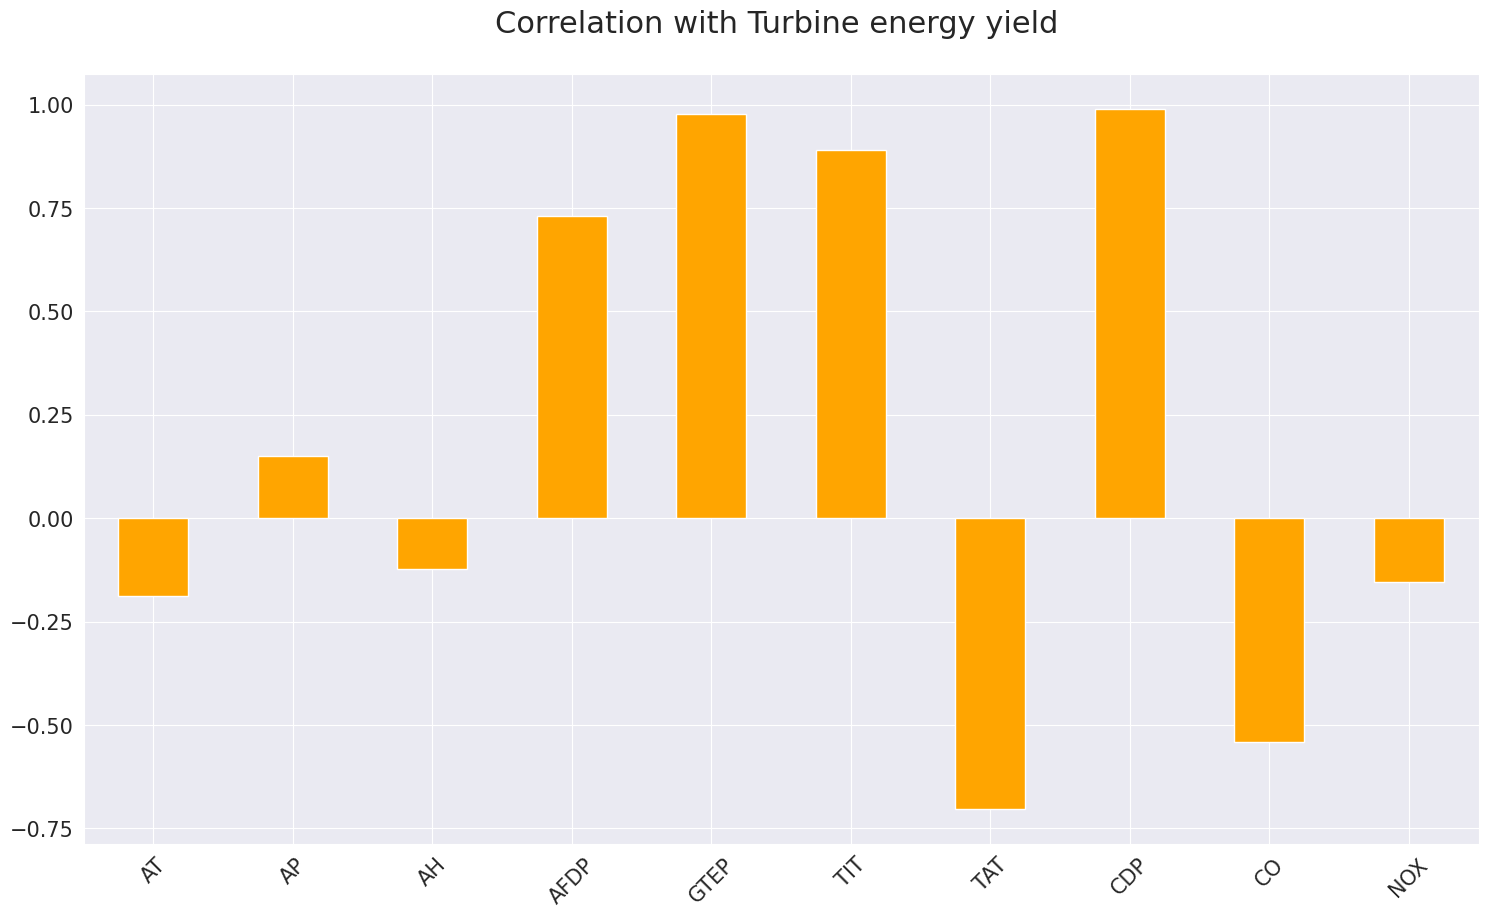

In [218]:
data2 = df.copy()

correlations = data2.corrwith(df.TEY)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Turbine energy yield \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

In [219]:
from numpy import set_printoptions

In [220]:
model_data = df[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO',"TEY"]]
model_data.head()

CDP    GTEP     TIT     TAT    AFDP      CO     TEY
0  10.605  19.663  1059.2  550.00  3.5000  3.1547  114.70
1  10.598  19.728  1059.3  550.00  3.4998  3.2363  114.72
2  10.601  19.779  1059.4  549.87  3.4824  3.2012  114.71
3  10.606  19.792  1059.6  549.99  3.4805  3.1923  114.72
4  10.612  19.765  1059.7  549.98  3.4976  3.2484  114.72

In [221]:
continuous_feature=[feature for feature in model_data.columns if model_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


In [222]:
df_standard_scaled = model_data.copy()
features = df_standard_scaled[continuous_feature]

In [223]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

CDP      GTEP       TIT       TAT      AFDP        CO       TEY
0 -1.346719 -1.361275 -1.449866  0.596589 -0.932036  0.487830 -1.229859
1 -1.353015 -1.345805 -1.443912  0.596589 -0.932304  0.522991 -1.228601
2 -1.350317 -1.333667 -1.437958  0.580336 -0.955568  0.507867 -1.229230
3 -1.345819 -1.330573 -1.426050  0.595338 -0.958109  0.504032 -1.228601
4 -1.340422 -1.336999 -1.420096  0.594088 -0.935245  0.528205 -1.228601

In [224]:
x = df_standard_scaled.drop('TEY',axis=1)
y = df_standard_scaled[['TEY']]

In [225]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [226]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [227]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(32,input_dim=7,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(units=1,activation="linear"))

    adam=Adam(learning_rate=0.001)
    model1.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model1

In [228]:
def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(32,input_dim=7,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(units=1,activation="linear"))

    adam=Adam(lr=0.001)
    model2.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model2

In [229]:
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(32,input_dim=7,activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(units=1,activation="linear"))

    adam=Adam(lr=0.001)
    model3.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model3

In [230]:
model_data

CDP    GTEP     TIT     TAT    AFDP      CO     TEY
0      10.605  19.663  1059.2  550.00  3.5000  3.1547  114.70
1      10.598  19.728  1059.3  550.00  3.4998  3.2363  114.72
2      10.601  19.779  1059.4  549.87  3.4824  3.2012  114.71
3      10.606  19.792  1059.6  549.99  3.4805  3.1923  114.72
4      10.612  19.765  1059.7  549.98  3.4976  3.2484  114.72
...       ...     ...     ...     ...     ...     ...     ...
16431  10.400  19.164  1049.7  546.21  3.5421  4.5186  111.61
16432  10.433  19.414  1046.3  543.22  3.5059  4.8470  111.78
16433  10.483  19.530  1037.7  537.32  3.4770  7.9632  110.19
16434  10.533  19.377  1043.2  541.24  3.4486  6.2494  110.74
16435  10.583  19.306  1049.9  545.85  3.4275  4.9816  111.58

[16436 rows x 7 columns]

In [231]:
x = model_data.drop('TEY', axis=1)
y = model_data[["TEY"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test) # scaling test data -- predictor

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(13148, 6)
(3288, 6)
(13148, 1)
(3288, 1)


In [232]:
df.shape


(16436, 11)

In [233]:
#reset index after dropping outliers
df = df.reset_index()
df = df.drop('index', axis = 1)
df

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
16431  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
16432  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
16433  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
16434  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
16435  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
16431  4.5186  79.559  
16432  4.8470  79.917  
16433  7.9632  90.912  
16434  6.2494  93.227  
16435  4.9816  92.498  

[16436 rows x 11 columns]

In [234]:

df = df.drop(['AT', 'AP', 'AH', 'NOX'], axis=1)


df.shape

(16436, 7)

In [235]:
norm = MinMaxScaler()
std = StandardScaler()

df_norm = pd.DataFrame(norm.fit_transform(df), columns=df.columns)
df_std = pd.DataFrame(std.fit_transform(df), columns=df.columns)

In [236]:
temp = df_std.sample(frac=1)
temp_s = df_std.sample(frac=0.1)

In [237]:
temp_s

AFDP      GTEP       TIT       TAT       TEY       CDP        CO
11572 -1.511783 -1.289637 -1.455821  0.589087 -1.353112 -1.371904  0.094125
14513 -0.049312 -0.244818  0.157763  0.617843 -0.034428 -0.172896 -0.284069
4196   0.419860  0.519399  0.925852  0.477817  0.224656  0.356898 -0.619122
6595   0.204060 -0.331450  0.133946  0.587837 -0.073416 -0.153108 -0.154801
13222 -0.788035 -0.746045 -0.675823  0.552831 -0.834317 -0.744066  0.178364
...         ...       ...       ...       ...       ...       ...       ...
7388  -2.164132 -0.848147 -1.229562 -0.239814 -0.556368 -0.755760  1.172172
7165  -0.513538  1.806501  0.985394 -1.957627  1.764694  1.681833 -0.780921
7846   0.763617  1.605153  1.003257 -1.787596  1.517558  1.636859 -0.719799
1721   2.674135  1.673221  0.973486 -1.685077  1.644584  1.565800 -0.698496
2921  -0.826409 -1.344853 -1.586813  0.585337 -1.474479 -1.442064  0.801390

[1644 rows x 7 columns]

In [238]:
x = temp_s.drop('TEY', axis=1)
y = temp_s['TEY']
x


AFDP      GTEP       TIT       TAT       CDP        CO
11572 -1.511783 -1.289637 -1.455821  0.589087 -1.371904  0.094125
14513 -0.049312 -0.244818  0.157763  0.617843 -0.172896 -0.284069
4196   0.419860  0.519399  0.925852  0.477817  0.356898 -0.619122
6595   0.204060 -0.331450  0.133946  0.587837 -0.153108 -0.154801
13222 -0.788035 -0.746045 -0.675823  0.552831 -0.744066  0.178364
...         ...       ...       ...       ...       ...       ...
7388  -2.164132 -0.848147 -1.229562 -0.239814 -0.755760  1.172172
7165  -0.513538  1.806501  0.985394 -1.957627  1.681833 -0.780921
7846   0.763617  1.605153  1.003257 -1.787596  1.636859 -0.719799
1721   2.674135  1.673221  0.973486 -1.685077  1.565800 -0.698496
2921  -0.826409 -1.344853 -1.586813  0.585337 -1.442064  0.801390

[1644 rows x 6 columns]

In [239]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1233, 6), (411, 6), (1233,), (411,))

In [240]:
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense

from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
tf.config.experimental.list_physical_devices('GPU')

[]

In [241]:
def create_model_two_hidden_layers():
    model = Sequential()
    model.add(Dense(5, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))

    adam=Adam(lr=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model
    import warnings
    warnings.filterwarnings('ignore')



model1 = create_model_two_hidden_layers()
print("Here is the summary of the model:")
model1.summary()

Here is the summary of the model:
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 5)                 35        
                                                                 
 dense_19 (Dense)            (None, 6)                 36        
                                                                 
 dense_20 (Dense)            (None, 10)                70        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 152 (608.00 Byte)
Trainable params: 152 (608.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [242]:
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(32, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))

    adam=Adam(lr=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [243]:

model2 = create_model_three_hidden_layers()
print("Here is the summary of the model2:")
model2.summary()

Here is the summary of the model2:
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 32)                224       
                                                                 
 dense_23 (Dense)            (None, 32)                1056      
                                                                 
 dense_24 (Dense)            (None, 64)                2112      
                                                                 
 dense_25 (Dense)            (None, 128)               8320      
                                                                 
 dense_26 (Dense)            (None, 1)                 129       
                                                                 
Total params: 11841 (46.25 KB)
Trainable params: 11841 (46.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________

In [244]:
%%time
epochs=500
batch_size=50

print("Here is the summary of this model:")
model2.summary()

with tf.device('/GPU:0'):
  model2.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)

Here is the summary of this model:
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 32)                224       
                                                                 
 dense_23 (Dense)            (None, 32)                1056      
                                                                 
 dense_24 (Dense)            (None, 64)                2112      
                                                                 
 dense_25 (Dense)            (None, 128)               8320      
                                                                 
 dense_26 (Dense)            (None, 1)                 129       
                                                                 
Total params: 11841 (46.25 KB)
Trainable params: 11841 (46.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________

In [245]:
print("Predicted values:")
model2.predict(x_test[:10])

Predicted values:
1/1 [==============================] - 0s 72ms/step


array([[ 1.699835  ],
       [ 0.5408981 ],
       [ 0.11920455],
       [-0.00428518],
       [-0.02334022],
       [-0.03219597],
       [-0.01436988],
       [ 1.1330447 ],
       [-1.4554416 ],
       [-0.5938755 ]], dtype=float32)

In [246]:
print('Actual values')
y_test[:10]

Actual values


7503     1.609998
11227    0.384382
4052     0.171204
11723   -0.026882
12821   -0.042603
14882    0.030343
8509    -0.023108
12011    0.784955
1304    -1.539250
9921    -0.590325
Name: TEY, dtype: float64

In [247]:
loss, mae, mse, mape = model2.evaluate(x_train, y_train)
print('\n', "Results for model 2:", '\n', "Training Loss:", loss, '\n', "Training Mean Absolute Error:" , mae, '\n', "Training Mean Squared Error:", mse)

39/39 [==============================] - 0s 2ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0471 - mape: 76.1979

 Results for model 2: 
 Training Loss: 0.003944526892155409 
 Training Mean Absolute Error: 0.003944526892155409 
 Training Mean Squared Error: 0.04709368571639061


In [248]:
loss, mae, mse, mape = model2.evaluate(x_test, y_test)
print('\n', "Results for model 2:", '\n', "Test Loss:", loss, '\n', "Test Mean Absolute Error:" , mae, '\n', "Test Mean Squared Error:", mse)

13/13 [==============================] - 0s 2ms/step - loss: 0.0083 - mse: 0.0083 - mae: 0.0585 - mape: 150.1469

 Results for model 2: 
 Test Loss: 0.008274560794234276 
 Test Mean Absolute Error: 0.008274560794234276 
 Test Mean Squared Error: 0.0585077628493309


Text(0.5, 1.0, 'Correlation Map of variables')

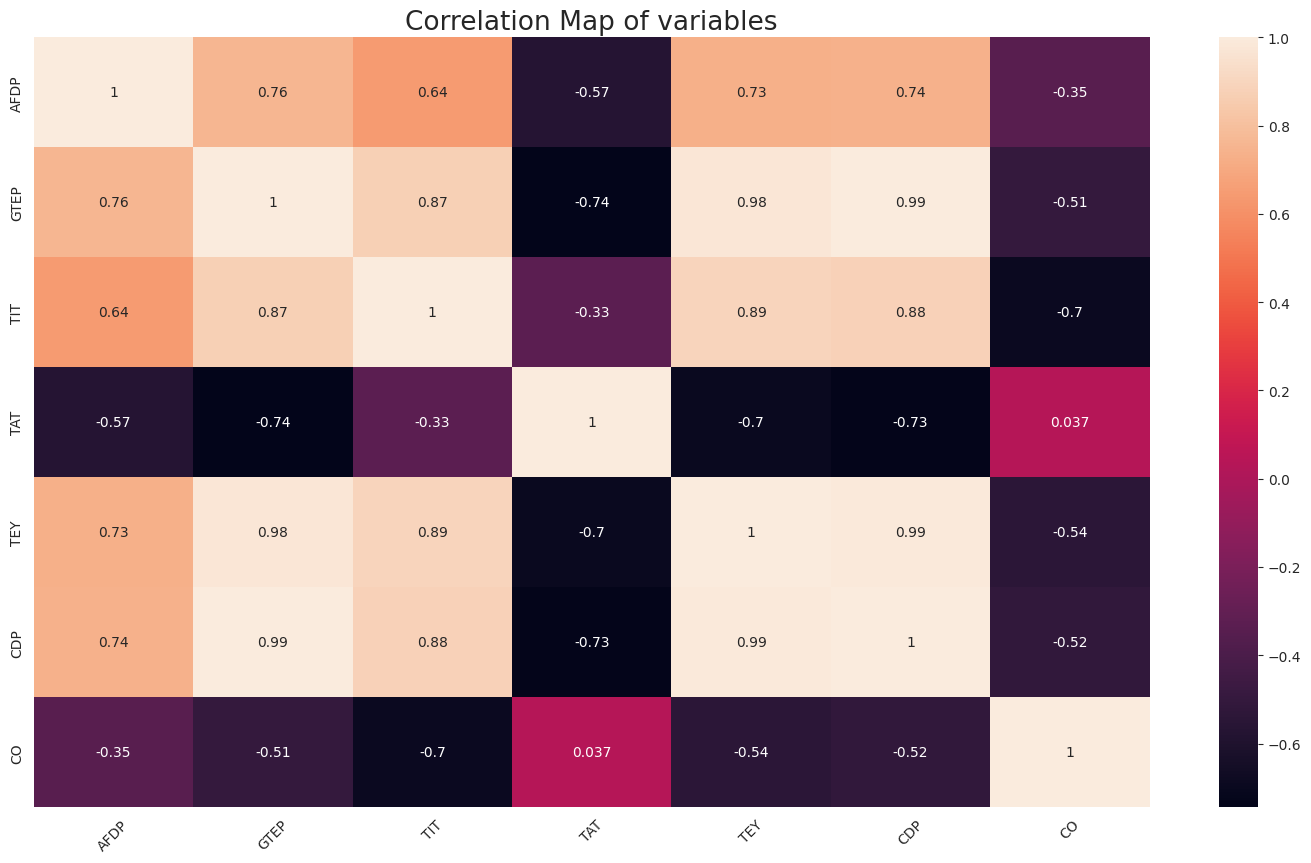

In [249]:
fig= plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of variables", fontsize=19)

In [250]:
!pip install ppscore

In [251]:
import ppscore as PPS
score = PPS.matrix(df)
score_s = score[score['y']=='TEY']
score_s.sort_values(by="ppscore", ascending=False)

x    y   ppscore            case  is_valid_score               metric  \
32   TEY  TEY  1.000000  predict_itself            True                 None   
39   CDP  TEY  0.872895      regression            True  mean absolute error   
11  GTEP  TEY  0.831712      regression            True  mean absolute error   
18   TIT  TEY  0.769473      regression            True  mean absolute error   
25   TAT  TEY  0.234680      regression            True  mean absolute error   
4   AFDP  TEY  0.196569      regression            True  mean absolute error   
46    CO  TEY  0.110827      regression            True  mean absolute error   

    baseline_score  model_score                    model  
32        0.000000     1.000000                     None  
39       11.354142     1.443168  DecisionTreeRegressor()  
11       11.354142     1.910761  DecisionTreeRegressor()  
18       11.354142     2.617439  DecisionTreeRegressor()  
25       11.354142     8.689556  DecisionTreeRegressor()  
4        11.354142     9.122270  DecisionTreeRegressor()  
46       11.354142    10.095799  DecisionTreeRegressor()

Text(0.5, 1.01, 'PPScore of each feature with Target variable')

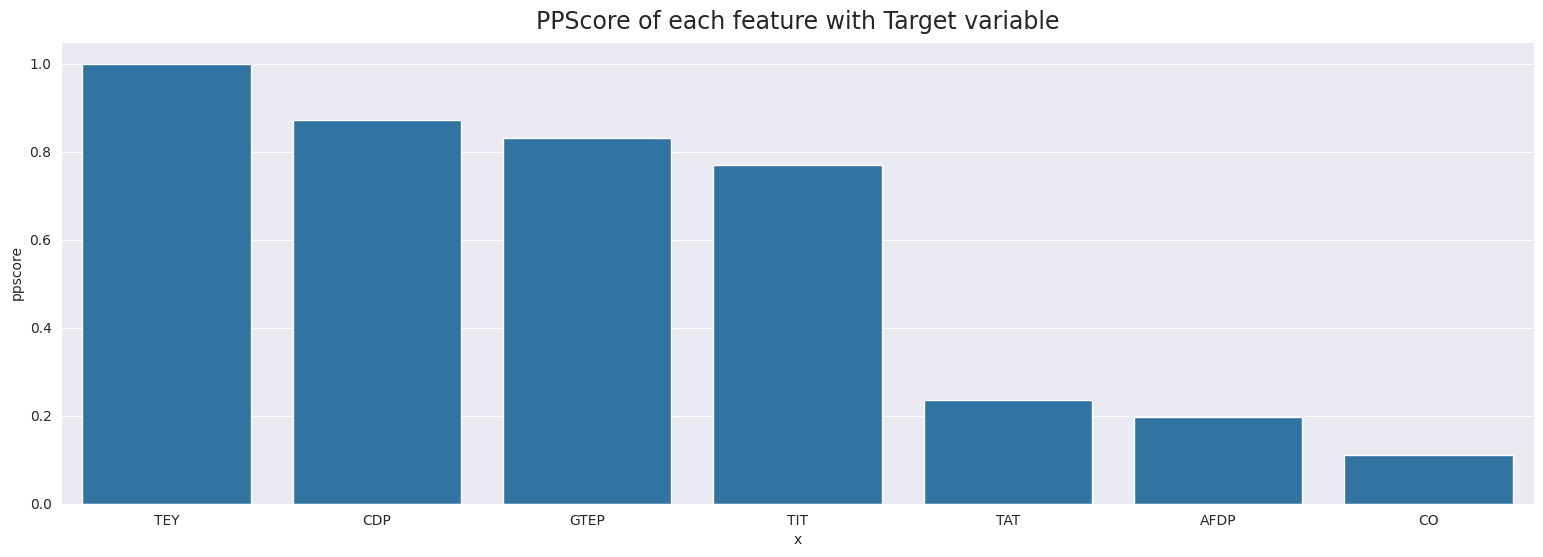

In [252]:
plt.rcParams['figure.figsize']=(19,6)
sns.barplot(x='x', y='ppscore', data=score_s.sort_values(by='ppscore', ascending=False))
plt.title("PPScore of each feature with Target variable", fontsize=17, y=1.01)

In [254]:
df.shape

(16436, 7)

In [255]:
#reset index after dropping outliers
df = df.reset_index()
df = df.drop('index', axis = 1)
df

AFDP    GTEP     TIT     TAT     TEY     CDP      CO
0      3.5000  19.663  1059.2  550.00  114.70  10.605  3.1547
1      3.4998  19.728  1059.3  550.00  114.72  10.598  3.2363
2      3.4824  19.779  1059.4  549.87  114.71  10.601  3.2012
3      3.4805  19.792  1059.6  549.99  114.72  10.606  3.1923
4      3.4976  19.765  1059.7  549.98  114.72  10.612  3.2484
...       ...     ...     ...     ...     ...     ...     ...
16431  3.5421  19.164  1049.7  546.21  111.61  10.400  4.5186
16432  3.5059  19.414  1046.3  543.22  111.78  10.433  4.8470
16433  3.4770  19.530  1037.7  537.32  110.19  10.483  7.9632
16434  3.4486  19.377  1043.2  541.24  110.74  10.533  6.2494
16435  3.4275  19.306  1049.9  545.85  111.58  10.583  4.9816

[16436 rows x 7 columns]

In [256]:
df.shape

(16436, 7)

In [257]:
#Standardize & Normalize the data
norm = MinMaxScaler()
std = StandardScaler()

df_norm = pd.DataFrame(norm.fit_transform(df), columns=df.columns)            #data between -3 to +3
df_std = pd.DataFrame(std.fit_transform(df), columns=df.columns)            #data between -1 to +1

In [258]:
#we will take a small model as this is large data and will take huge amount of time to build model
#to reandomly shuffle and select a % of data
temp = df_std.sample(frac=1)          #shuffle all the data
temp_s = df_std.sample(frac=0.1)      #shuffle and select only 10% of the data randomly to train

In [259]:
temp_s

AFDP      GTEP       TIT       TAT       TEY       CDP        CO
7126  -0.656335  1.262910  0.967532 -1.415028  1.477312  1.417386 -0.687715
7146  -0.518351  1.294802  0.979440 -1.330012  1.331420  1.410190 -0.371497
8946  -0.077391 -0.429506  0.122038  0.615342 -0.026882 -0.225066 -0.373307
15361 -0.300545 -0.287896  0.229213  0.609091  0.024055 -0.136917 -0.220211
13676  0.589934  0.974692  0.979440 -0.951193  1.210054  1.155637 -0.505444
...         ...       ...       ...       ...       ...       ...       ...
6738  -1.825857 -0.187936  0.300663  0.601590  0.060528 -0.138716 -0.361328
3261  -0.434919 -0.603246 -0.568647  0.586587 -0.839347 -0.666711  0.675613
4882  -1.079914 -1.294159 -1.503454  0.574085 -1.480768 -1.389894  0.798762
7932  -0.598174 -0.351680  0.032725  0.532827  0.001416 -0.266442 -0.741378
10466 -0.471421 -0.109872  0.217305  0.475317 -0.001728 -0.064958 -0.322634

[1644 rows x 7 columns]

In [260]:
x = temp_s.drop('TEY', axis=1)
y = temp_s['TEY']
x

AFDP      GTEP       TIT       TAT       CDP        CO
7126  -0.656335  1.262910  0.967532 -1.415028  1.417386 -0.687715
7146  -0.518351  1.294802  0.979440 -1.330012  1.410190 -0.371497
8946  -0.077391 -0.429506  0.122038  0.615342 -0.225066 -0.373307
15361 -0.300545 -0.287896  0.229213  0.609091 -0.136917 -0.220211
13676  0.589934  0.974692  0.979440 -0.951193  1.155637 -0.505444
...         ...       ...       ...       ...       ...       ...
6738  -1.825857 -0.187936  0.300663  0.601590 -0.138716 -0.361328
3261  -0.434919 -0.603246 -0.568647  0.586587 -0.666711  0.675613
4882  -1.079914 -1.294159 -1.503454  0.574085 -1.389894  0.798762
7932  -0.598174 -0.351680  0.032725  0.532827 -0.266442 -0.741378
10466 -0.471421 -0.109872  0.217305  0.475317 -0.064958 -0.322634

[1644 rows x 6 columns]

In [261]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [263]:
# create model with 2 hidden layers
def create_model_two_hidden_layers():
    model = Sequential()
    model.add(Dense(5, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))

    adam=Adam(lr=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model


In [264]:
model1 = create_model_two_hidden_layers()
print("Here is the summary of the model:")
model1.summary()

Here is the summary of the model:
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 5)                 35        
                                                                 
 dense_28 (Dense)            (None, 6)                 36        
                                                                 
 dense_29 (Dense)            (None, 10)                70        
                                                                 
 dense_30 (Dense)            (None, 1)                 11        
                                                                 
Total params: 152 (608.00 Byte)
Trainable params: 152 (608.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [265]:
#create a model with 3 hidden layers
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(32, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))

    adam=Adam(lr=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model


In [266]:
model2 = create_model_three_hidden_layers()
print("Here is the summary of the model2:")
model2.summary()

Here is the summary of the model2:
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 32)                224       
                                                                 
 dense_32 (Dense)            (None, 32)                1056      
                                                                 
 dense_33 (Dense)            (None, 64)                2112      
                                                                 
 dense_34 (Dense)            (None, 128)               8320      
                                                                 
 dense_35 (Dense)            (None, 1)                 129       
                                                                 
Total params: 11841 (46.25 KB)
Trainable params: 11841 (46.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________

In [267]:
%%time
epochs=500
batch_size=50

print("Here is the summary of this model:")
model2.summary()

with tf.device('/GPU:0'):
  model2.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)

Here is the summary of this model:
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 32)                224       
                                                                 
 dense_32 (Dense)            (None, 32)                1056      
                                                                 
 dense_33 (Dense)            (None, 64)                2112      
                                                                 
 dense_34 (Dense)            (None, 128)               8320      
                                                                 
 dense_35 (Dense)            (None, 1)                 129       
                                                                 
Total params: 11841 (46.25 KB)
Trainable params: 11841 (46.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________

In [268]:
print("Predicted values:")
model2.predict(x_test[:10])

Predicted values:
1/1 [==============================] - 0s 111ms/step


array([[ 0.05876396],
       [ 1.1191403 ],
       [-0.00224159],
       [ 0.05952965],
       [-1.4474257 ],
       [ 1.5423398 ],
       [-1.196869  ],
       [-1.3989536 ],
       [ 1.4164755 ],
       [-1.0187309 ]], dtype=float32)

In [269]:
print('Actual values')
y_test[:10]

Actual values


272      0.163658
1911     1.236465
16216    0.032230
4463     0.032230
3975    -1.507808
724      1.712500
4647    -1.427316
4629    -1.477623
10244    1.473539
2775    -0.968889
Name: TEY, dtype: float64

In [270]:
loss, mae, mse, mape = model2.evaluate(x_train, y_train)
print('\n', "Results for model 2:", '\n', "Training Loss:", loss, '\n', "Training Mean Absolute Error:" , mae, '\n', "Training Mean Squared Error:", mse)

39/39 [==============================] - 0s 2ms/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0541 - mape: 116.2937

 Results for model 2: 
 Training Loss: 0.005176043603569269 
 Training Mean Absolute Error: 0.005176043603569269 
 Training Mean Squared Error: 0.05412590876221657


In [271]:
loss, mae, mse, mape = model2.evaluate(x_test, y_test)
print('\n', "Results for model 2:", '\n', "Test Loss:", loss, '\n', "Test Mean Absolute Error:" , mae, '\n', "Test Mean Squared Error:", mse)

13/13 [==============================] - 0s 2ms/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0649 - mape: 95.9835

 Results for model 2: 
 Test Loss: 0.007680276408791542 
 Test Mean Absolute Error: 0.007680276408791542 
 Test Mean Squared Error: 0.06494882702827454


In [272]:
#create a model with 3 hidden layers with best hyperparameters
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(8, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))

    adam=Adam(lr=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [273]:
%%time
epochs=300
batch_size=70

final_model=create_model_three_hidden_layers()

print("Here is the summary of our final model:")
final_model.summary()

with tf.device('/GPU:0'):
  final_model.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)

Here is the summary of our final model:
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 8)                 56        
                                                                 
 dense_37 (Dense)            (None, 128)               1152      
                                                                 
 dense_38 (Dense)            (None, 64)                8256      
                                                                 
 dense_39 (Dense)            (None, 128)               8320      
                                                                 
 dense_40 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17913 (69.97 KB)
Trainable params: 17913 (69.97 KB)
Non-trainable params: 0 (0.00 Byte)
____________________________________________

In [274]:
loss, mae, mse, mape = final_model.evaluate(x_train, y_train)
print('\n', "Results for final model :", '\n', "Training Loss:", loss, '\n', "Training Mean Absolute Error:" , mae, '\n', "Training Mean Squared Error:", mse)

39/39 [==============================] - 0s 2ms/step - loss: 0.0071 - mse: 0.0071 - mae: 0.0606 - mape: 120.2818

 Results for final model : 
 Training Loss: 0.00705752894282341 
 Training Mean Absolute Error: 0.00705752894282341 
 Training Mean Squared Error: 0.06059708073735237


In [275]:
loss_t, mae_t, mse_t, mape_t = final_model.evaluate(x_test, y_test)
print('\n', "Results for final model :", '\n', "Test Loss:", loss_t, '\n', "Test Mean Absolute Error:" , mae_t, '\n', "Test Mean Squared Error:", mse_t)

13/13 [==============================] - 0s 2ms/step - loss: 0.0095 - mse: 0.0095 - mae: 0.0671 - mape: 93.7980

 Results for final model : 
 Test Loss: 0.00945194624364376 
 Test Mean Absolute Error: 0.00945194624364376 
 Test Mean Squared Error: 0.06714621186256409
